# 생체 광학 데이터 분석 AI 경진대회

https://dacon.io/competitions/official/235608/overview/description

데이터 규모가 커지면 ai 학습 시키는데 1년 2억 정도 들 수 있다
최대한 효율적으로 저비용으로 학습 할 수 있는 코드를 짜야한다.

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 판다스와 넘파이
import pandas as pd
import numpy as np

# 이미지, 시각화, 분석
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#머신러닝(인공지능), lightgbm, 선형회귀, 가볍고 가성비가 좋다 머신러닝 중에 많이 쓰는 편
import lightgbm as lgb
from lightgbm import LGBMRegressor #(기본적으로 여러 label을 못가져온다?)

# 검증평가
from sklearn.multioutput import MultiOutputRegressor # 두개 이상의 label을 가질 경우
from sklearn.model_selection import cross_val_score # 교차 검증
from sklearn.metrics import mean_absolute_error # loss 함수 함수 MA (절댓값으로 빼준다?)

# 반복문 시간을 알려주는 것, for 반복문 쓴 거 보다 10배 빠름
from tqdm import tqdm
# 불필요한 오류를 안보이게 해줌
import warnings ; warnings.filterwarnings('ignore')

## 데이터 불러오기

In [3]:
#train = pd.read_csv(r'C:\Users\A\Desktop\python_study\실전데이터알아보기(real)\train.csv')
#test = pd.read_csv(r'C:\Users\A\Desktop\python_study\실전데이터알아보기(real)\test.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


In [4]:
# id : index number랑 동일, 필요없음
# rho : 측정거리(mm) 25, 10, 15, 20
train['rho'].unique()

array([25, 10, 15, 20], dtype=int64)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10000 non-null  int64  
 1   rho      10000 non-null  int64  
 2   650_src  10000 non-null  float64
 3   660_src  10000 non-null  float64
 4   670_src  10000 non-null  float64
 5   680_src  10000 non-null  float64
 6   690_src  10000 non-null  float64
 7   700_src  10000 non-null  float64
 8   710_src  10000 non-null  float64
 9   720_src  10000 non-null  float64
 10  730_src  10000 non-null  float64
 11  740_src  10000 non-null  float64
 12  750_src  10000 non-null  float64
 13  760_src  10000 non-null  float64
 14  770_src  10000 non-null  float64
 15  780_src  10000 non-null  float64
 16  790_src  10000 non-null  float64
 17  800_src  10000 non-null  float64
 18  810_src  10000 non-null  float64
 19  820_src  10000 non-null  float64
 20  830_src  10000 non-null  float64
 21  840_src  1000

<AxesSubplot:>

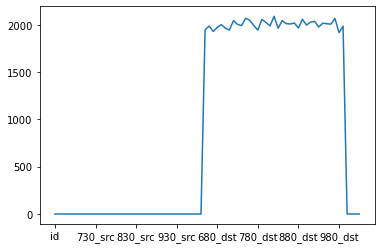

In [6]:
# 시각화를 통해 빈값을 한눈에 알아볼 수 있다.
train.isnull().sum().plot()

In [7]:
train.columns # 컬럼이 너무 많으면 이것도 ... 처리될 수 있다

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src', '730_src', '740_src', '750_src',
       '760_src', '770_src', '780_src', '790_src', '800_src', '810_src',
       '820_src', '830_src', '840_src', '850_src', '860_src', '870_src',
       '880_src', '890_src', '900_src', '910_src', '920_src', '930_src',
       '940_src', '950_src', '960_src', '970_src', '980_src', '990_src',
       '650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst', 'hhb', 'hbo2',
       'ca', 'na'],
      dtype='object')

In [8]:
column = ['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
          '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
          '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
          '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
          '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
          '950_dst', '960_dst', '970_dst', '980_dst', '990_dst']
train[column].head()

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,2.447758e-18,1.894578e-18,0.000000e+00,6.412913e-18,1.098559e-17,8.907142e-19,NaN,0.000000e+00,NaN,0.000000e+00,...,NaN,3.527371e-18,NaN,6.455564e-19,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17
1,0.000000e+00,0.000000e+00,0.000000e+00,1.995530e-10,1.025259e-10,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,...,2.647633e-09,NaN,5.233480e-09,1.264238e-08,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN
2,1.677445e-19,3.763590e-20,NaN,0.000000e+00,NaN,NaN,8.981651e-19,1.944683e-19,8.126907e-19,2.183200e-19,...,4.629125e-18,1.409413e-18,3.237480e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN
3,4.044975e-11,NaN,5.345363e-11,9.106886e-12,1.881458e-11,3.617201e-11,7.909656e-13,NaN,1.583839e-10,NaN,...,1.274876e-10,6.118947e-11,NaN,1.663888e-10,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN
4,4.784751e-14,NaN,0.000000e+00,1.153089e-13,0.000000e+00,0.000000e+00,1.056991e-13,0.000000e+00,0.000000e+00,2.666663e-14,...,0.000000e+00,NaN,1.537619e-14,4.996522e-14,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN


In [9]:
# 유사한 컬럼 이름 있을 경우 규칙을 찾아 추출할 수 있다.
train_dst = train.filter(regex = '_dst$', axis='columns')
train_dst.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

<AxesSubplot:>

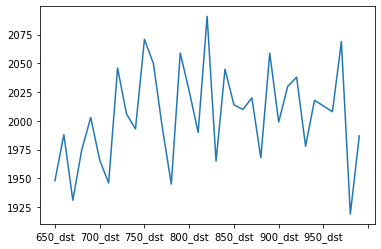

In [10]:
train_dst.isnull().sum().plot()

In [11]:
# T 행과 열을 바꿈 전치
train_dst.head().T

,0,1,2,3,4
650_dst,2.447758e-18,0.000000e+00,1.677445e-19,4.044975e-11,4.784751e-14
660_dst,1.894578e-18,0.000000e+00,3.763590e-20,NaN,NaN
670_dst,0.000000e+00,0.000000e+00,NaN,5.345363e-11,0.000000e+00
680_dst,6.412913e-18,1.995530e-10,0.000000e+00,9.106886e-12,1.153089e-13
690_dst,1.098559e-17,1.025259e-10,NaN,1.881458e-11,0.000000e+00
700_dst,8.907142e-19,0.000000e+00,NaN,3.617201e-11,0.000000e+00
710_dst,NaN,0.000000e+00,8.981651e-19,7.909656e-13,1.056991e-13
720_dst,0.000000e+00,0.000000e+00,1.944683e-19,NaN,0.000000e+00
730_dst,NaN,NaN,8.126907e-19,1.583839e-10,0.000000e+00
740_dst,0.000000e+00,0.000000e+00,2.183200e-19,NaN,2.666663e-14


<AxesSubplot:>

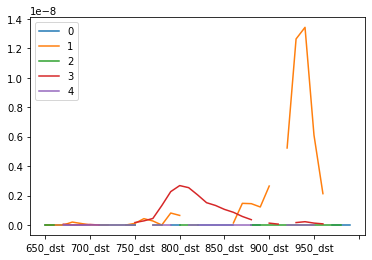

In [12]:
train_dst.head().T.plot()

<AxesSubplot:>

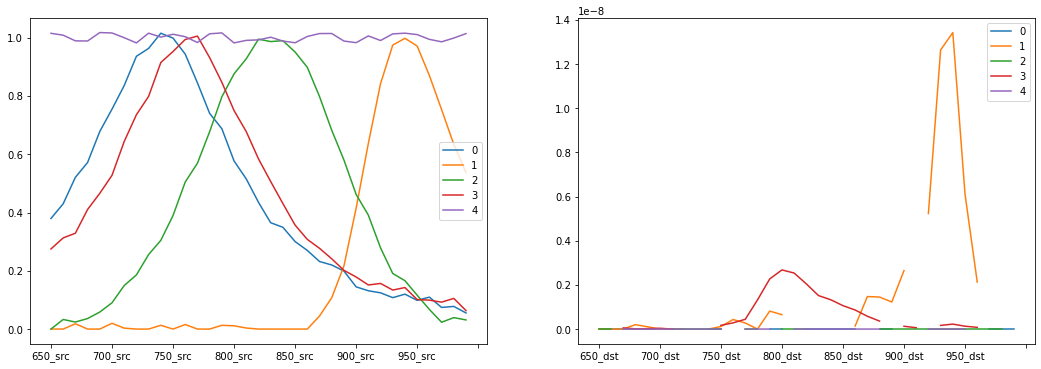

In [13]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
train.filter(regex='_src$', axis='columns').head().T.plot(ax=ax1)
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax2)

In [14]:
# 모르는 분야라도 논문 등 정보를 찾고 이해해서 식을 세울 수 있어야한다
# 단위 차이는 반영해주나 안해주나 인공지능 학습에 큰 차이는 없을 수 있지만 해주는 게 좋긴 하다 
# 비어-람베르트 법칙 흡광도=매질의 흡수율*매질 내 빛의 이동거리(cm)*매질의 농도

## 보간 하기

<AxesSubplot:>

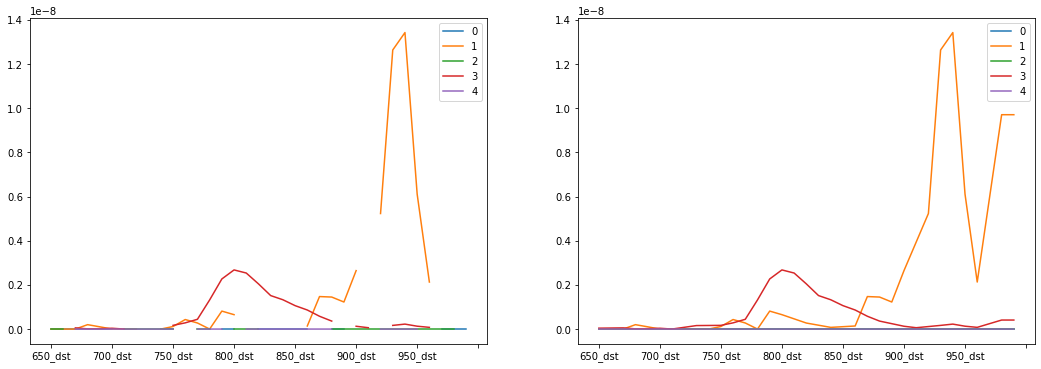

In [15]:
# 빈값을 채우는 것 보간한다 interpolate method='linear' 직선으로 이어준다 가장 기본적임
# interpolate 는 디폴트가 method='linear', axis=0 이렇게 되어있다.
# axis=0은 행 방향, axis=1은 열 방향 지금은 전치행렬이기 때문에 axis=0 행 방향으로 한다.
# method='linear'는 문자열 컬럼도 보간이 가능하지만, 다른 메소드는 보간 불가능하다
# 적절한 보간법을 찾아서 학습시켜야한다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
train.filter(regex='_dst$', axis='columns').head().T.plot(ax=ax1)
train.filter(regex='_dst$', axis='columns').head().T.interpolate(method='linear', axis=0).plot(ax=ax2)

In [16]:
train_dst.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [17]:
list(650 + np.arange(35)*10)

[650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990]

In [18]:
train_dst.columns = list(650 + np.arange(35)*10)
train_dst.columns

Int64Index([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
            780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
            910, 920, 930, 940, 950, 960, 970, 980, 990],
           dtype='int64')

<AxesSubplot:>

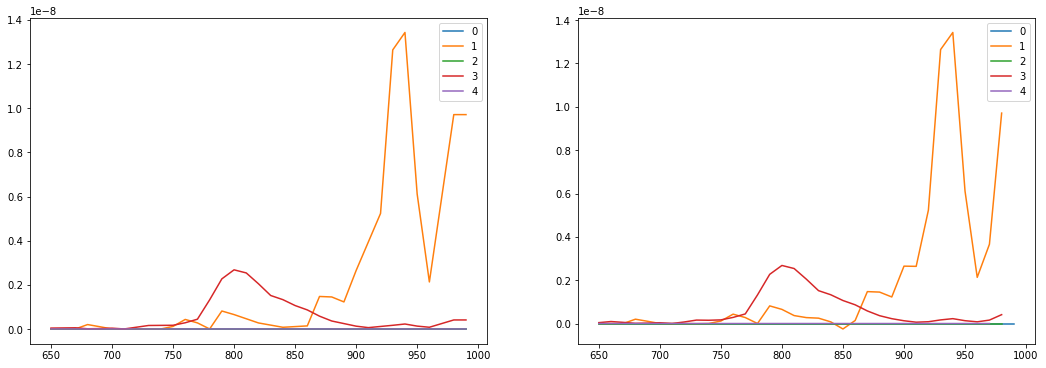

In [19]:
# cubic은 곡선 살짝 각진 형태로 보간
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
train_dst.head().T.interpolate(method='linear', axis=0).plot(ax=ax1)
train_dst.head().T.interpolate(method='cubic', axis=0).plot(ax=ax2)

<AxesSubplot:>

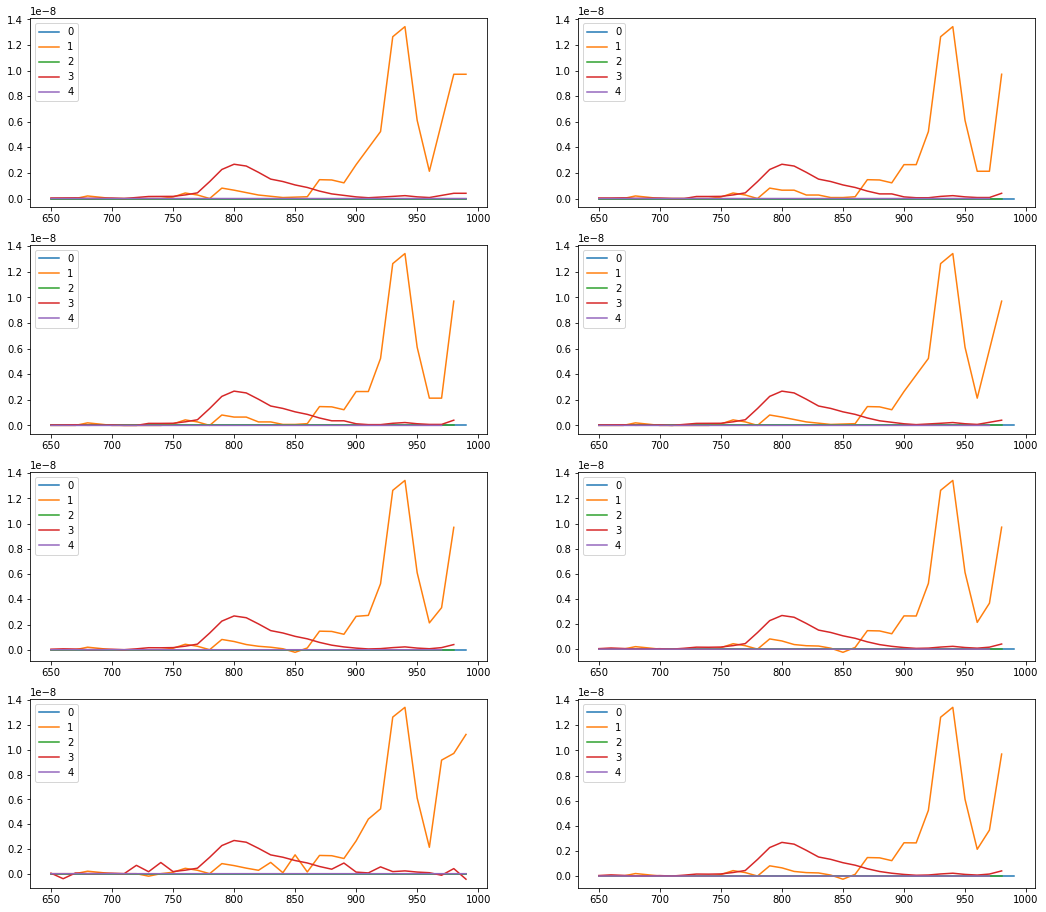

In [20]:
# linear, nearest, zero, slinear, quadratic, cubic, spline, polynomial
# linear, nearest, zero, slinear은 직선, quadratic, cubit, spline, polynomial은 곡선
# spline, polynomial은 곡선 oreder가 필요하다 주로 3을 쓴다
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_dst.head().T.interpolate(method='linear', axis=0).plot(ax=ax1)
train_dst.head().T.interpolate(method='nearest', axis=0).plot(ax=ax2)
train_dst.head().T.interpolate(method='zero', axis=0).plot(ax=ax3)
train_dst.head().T.interpolate(method='slinear', axis=0).plot(ax=ax4)
train_dst.head().T.interpolate(method='quadratic', axis=0).plot(ax=ax5)
train_dst.head().T.interpolate(method='cubic', axis=0).plot(ax=ax6)
train_dst.head().T.interpolate(method='spline',order=3, axis=0).plot(ax=ax7)
train_dst.head().T.interpolate(method='polynomial',order=3, axis=0).plot(ax=ax8)

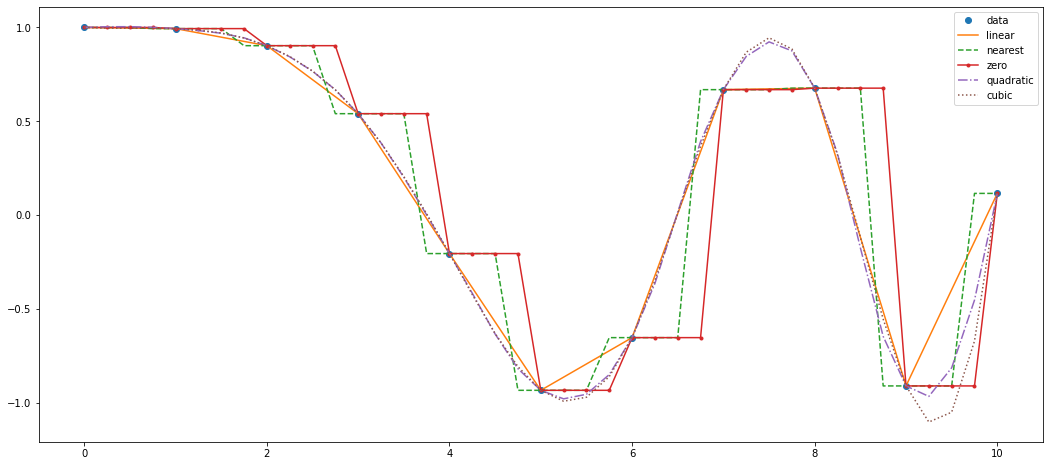

In [21]:
# 보간방법 비교
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint = True)
y = np.cos(-x**2/9)
f = interp1d(x,y) # linear 점 사이를 직선으로 이어준다
f2 = interp1d(x,y, kind = 'nearest') # nearest 계단식, 지그재그 같은 형태, 1/3위치에 데이터 
f3 = interp1d(x,y, kind = 'zero') # zero 계단식, 지그재그 같은 형태, nearest와 유사하지만 오른쪽 돌출됨
f4 = interp1d(x,y, kind = 'quadratic') # quadratic
f5 = interp1d(x,y, kind = 'cubic') # cubic
#spline, polynomial 은 근본적으로 차이가 있으며, interpld에는 포함되어 있지 않다.
xnew = np.linspace(0, 10, num = 41,  endpoint = True)
plt.figure(figsize=(18,8))
plt.plot(x,y,'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.-',
         xnew, f4(xnew), '-.', xnew, f5(xnew), ':',)
plt.legend(['data', 'linear', 'nearest', 'zero', 'quadratic', 'cubic'])
plt.show()

In [22]:
train_dst.columns = list(650 + np.arange(35)*10) # 문자열 컬럼을 숫자 컬럼으로 변경
train_dst = train_dst.interpolate(method='quadratic',axis=1) # quadratic 보간으로 빈값 채움
train_dst_i = train_dst.interpolate(method='zero',axis=1) # zero 보간으로 빈값 채움
train_dst_i = train_dst.interpolate(method='linear',axis=1) # linear 보간으로 빈값 채움
train_dst_i.columns=train.filter(regex='_dst$', axis='columns').columns #숫자 컬럼을 문자열 컬럼으로 되돌림
train_dst_i.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

In [23]:
test_dst = test.filter(regex='_dst', axis='columns') # _dst 컬럼 추출
test_dst.columns = list(650 + np.arange(35)*10) # 문자열 컬럼 숫자 컬럼 변환
test_dst = test_dst.interpolate(method='quadratic',axis=1) # quadratic 보간으로 빈값 채움
test_dst_i = test_dst.interpolate(method='zero',axis=1) # zero 보간
test_dst_i = test_dst.interpolate(method='linear',axis=1) # linear 보간으로 빈값 채움
test_dst_i.columns = test.filter(regex='_dst$', axis='columns').columns #숫자 컬럼을 문자열 컬럼으로 변경
test_dst_i.columns

Index(['650_dst', '660_dst', '670_dst', '680_dst', '690_dst', '700_dst',
       '710_dst', '720_dst', '730_dst', '740_dst', '750_dst', '760_dst',
       '770_dst', '780_dst', '790_dst', '800_dst', '810_dst', '820_dst',
       '830_dst', '840_dst', '850_dst', '860_dst', '870_dst', '880_dst',
       '890_dst', '900_dst', '910_dst', '920_dst', '930_dst', '940_dst',
       '950_dst', '960_dst', '970_dst', '980_dst', '990_dst'],
      dtype='object')

<AxesSubplot:>

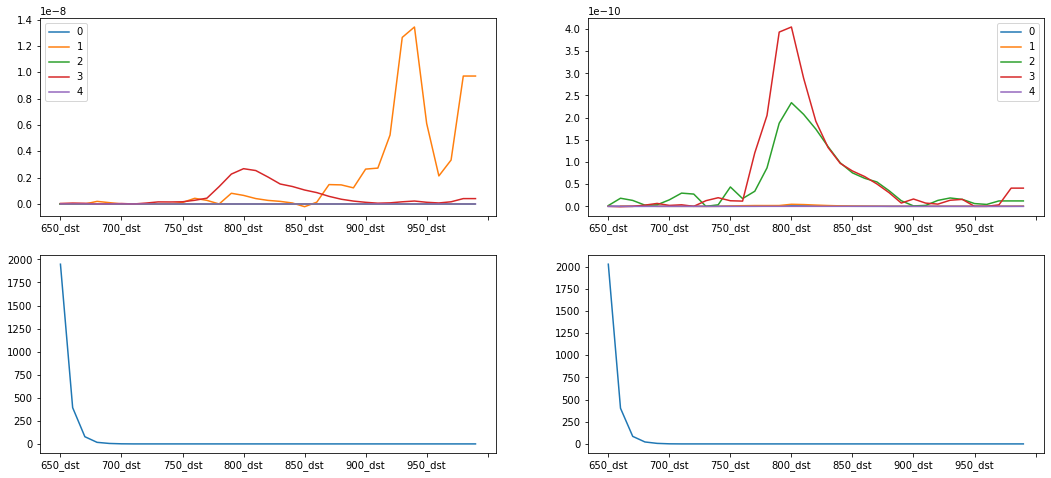

In [24]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)
train_dst_i.head().T.plot(ax=ax1)
test_dst_i.head().T.plot(ax=ax2)
train_dst_i.isnull().sum().plot(ax=ax3)
test_dst_i.isnull().sum().plot(ax=ax4)
# 이렇게 해도 650~700 쯤 값은 채워지지 않고 있다. 이를 추가로 보간해야한다.

In [25]:
# 오른쪽 값으로 보간
# 빈값이면 바로 오른쪽 값을 넣어준다
# 문자열에 수식 입력 i = 0 이면, '980_dst', i=1이면 '970_dst' ...
for i in range(34):
# 리니어 보간이라 990은 무조건 차있다 1000도 없으니 980부터 시작한다
    train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isnull(),
                    f'{980-(i*10)}_dst'] = train_dst_i.loc[train_dst_i[f'{980-(i*10)}_dst'].isnull(),
                                                            f'{990-(i*10)}_dst']
# = train_dst_i[f'{990-(i*10)}_dst'] 이렇게 해도 될 것 같은데, 일단 배운대로 두기
    test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isnull(),
                   f'{980-(i*10)}_dst'] = test_dst_i.loc[test_dst_i[f'{980-(i*10)}_dst'].isnull(),
                                                         f'{990-(i*10)}_dst']

<AxesSubplot:>

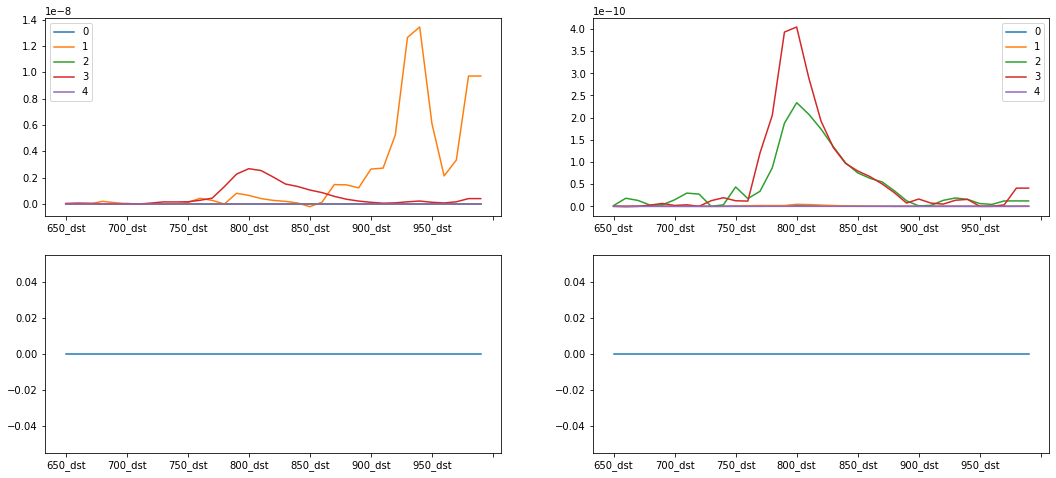

In [26]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)
train_dst_i.head().T.plot(ax=ax1)
test_dst_i.head().T.plot(ax=ax2)
train_dst_i.isnull().sum().plot(ax=ax3)
test_dst_i.isnull().sum().plot(ax=ax4)

In [27]:
# train/test data를 update함
train.update(train_dst_i)
test.update(test_dst_i)
train

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,-3.614881e-21,0.000000e+00,5.037539e-19,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,3.335414e-09,9.710091e-09,9.710091e-09,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,1.329725e-18,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,1.672722e-10,4.088921e-10,4.088921e-10,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,7.011971e-14,1.330237e-13,1.330237e-13,1.330237e-13,11.97,4.41,10.78,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,0.23929,0.30265,0.39929,0.51000,0.64072,0.77328,0.86722,0.95891,...,6.788642e-16,0.000000e+00,5.516467e-16,9.690979e-16,1.391635e-15,5.460702e-14,12.68,4.11,12.31,0.10
9996,9996,20,0.02583,0.00946,0.03650,0.01380,0.04093,0.04363,0.03260,0.05282,...,1.814274e-16,1.117148e-16,7.352416e-17,-2.746491e-16,5.825347e-16,4.226436e-15,8.46,4.11,10.46,3.12
9997,9997,10,0.57589,0.62976,0.70571,0.77248,0.85402,0.92796,0.97691,0.98933,...,4.828451e-11,3.110419e-11,8.119095e-12,3.222922e-11,1.504115e-10,4.003657e-10,9.84,3.20,10.45,2.06
9998,9998,15,1.01477,1.01504,0.99125,0.98747,1.00717,1.01434,0.99529,1.01322,...,3.279271e-13,0.000000e+00,4.475946e-14,-4.099816e-13,2.818857e-12,1.408742e-11,6.38,4.06,11.28,4.03


In [28]:
test

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,1.637499e-14,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,5.950230e-14,2.830975e-14,1.114337e-13,4.825731e-14,9.189698e-15,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,9.312964e-13,2.083144e-12,1.342166e-11,1.885213e-11,1.569208e-11,6.242378e-12,4.308102e-12,1.219010e-11,1.219010e-11,1.219010e-11
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,1.370042e-11,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,4.106134e-11
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,15,0.04334,0.03279,0.05853,0.04070,0.07704,0.07859,0.06168,0.08903,...,7.889599e-13,5.777064e-13,4.903209e-13,1.365078e-12,7.929664e-13,0.000000e+00,0.000000e+00,1.472213e-13,1.479745e-12,5.391520e-12
9996,19996,25,0.00020,0.02009,0.01726,0.03816,0.08300,0.08681,0.15300,0.18099,...,1.240848e-17,6.258180e-18,8.693704e-20,1.260999e-18,4.514449e-18,3.691198e-18,9.128300e-19,-1.699072e-18,3.928314e-18,2.586781e-17
9997,19997,15,0.00000,0.00000,0.00120,0.00000,0.04347,0.14882,0.40883,0.80365,...,0.000000e+00,-6.662856e-15,0.000000e+00,2.610282e-14,7.789652e-15,-1.212682e-15,1.271388e-15,1.436617e-15,0.000000e+00,1.743751e-13
9998,19998,20,0.08390,0.05690,0.08343,0.12324,0.12720,0.16732,0.18149,0.23766,...,0.000000e+00,7.084232e-18,5.078262e-18,0.000000e+00,2.669004e-18,8.586549e-18,0.000000e+00,4.489194e-18,2.892986e-17,2.892986e-17


<AxesSubplot:>

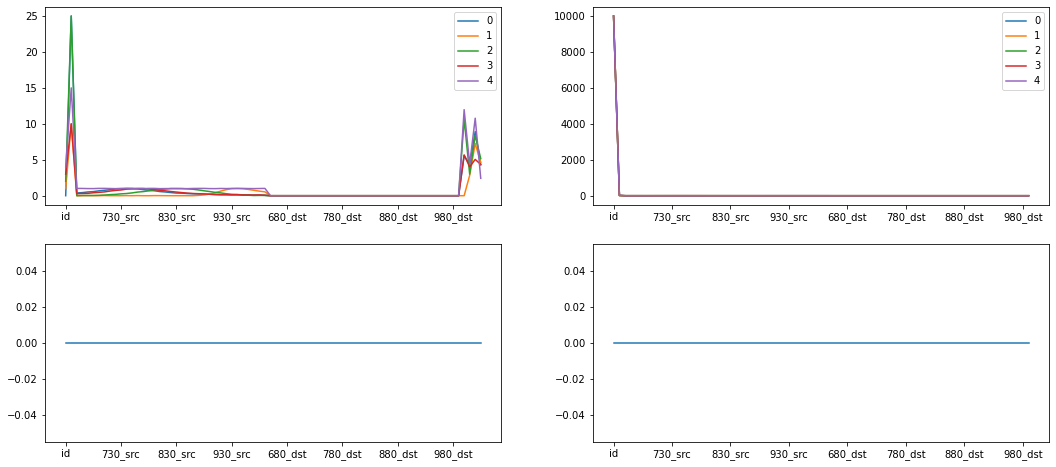

In [29]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)
train.head().T.plot(ax=ax1)
test.head().T.plot(ax=ax2)
train.isnull().sum().plot(ax=ax3)
test.isnull().sum().plot(ax=ax4)

## 흡광도 A 컬럼 만들기

In [30]:
# beer-lambert 법칙 --> 흡광도 A 컬럼 만들기
# np.log(src/dst) ratio2
# np.log(src/dst)/(rho*0.1) ratio
for i in range(35):
    train[f'{650+(i*10)}_ratio']=np.log(train[f'{650+(i*10)}_src']/train[f'{650+(i*10)}_dst'])/(train['rho']*0.1)
    test[f'{650+(i*10)}_ratio']=np.log(test[f'{650+(i*10)}_src']/test[f'{650+(i*10)}_dst'])/(test['rho']*0.1)     

In [31]:
for i in range(35):
    train[f'{650+(i*10)}_ratio2']=np.log(train[f'{650+(i*10)}_src']/train[f'{650+(i*10)}_dst'])
    test[f'{650+(i*10)}_ratio2']=np.log(test[f'{650+(i*10)}_src']/test[f'{650+(i*10)}_dst'])

<AxesSubplot:>

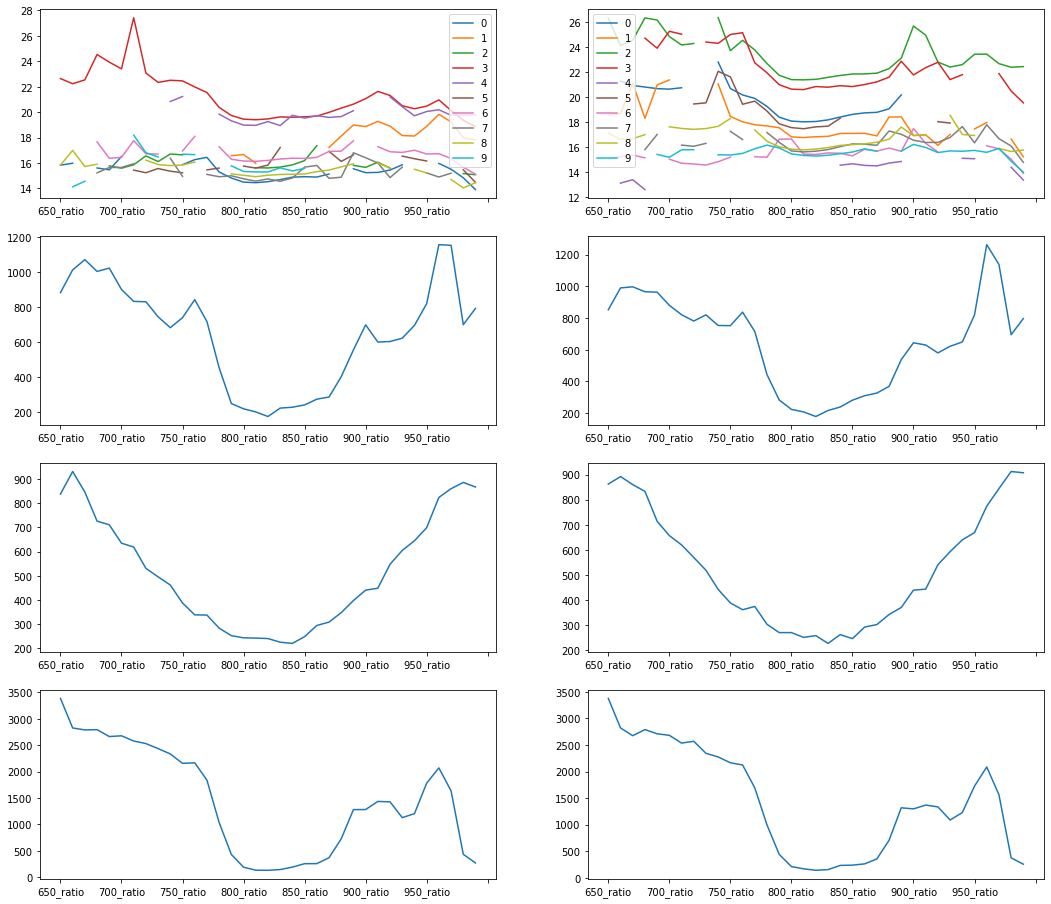

In [32]:
# ratio의 그래프, 빈값, 음의 무한대, 양의 무한대
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train.filter(regex='_ratio$', axis='columns').head(10).T.plot(ax=ax1)
test.filter(regex='_ratio$', axis='columns').head(10).T.plot(ax=ax2)
train.filter(regex='_ratio$', axis='columns').isnull().sum().plot(ax=ax3)
test.filter(regex='_ratio$', axis='columns').isnull().sum().plot(ax=ax4)
train.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)
#빈값들은 채워주는 편이 좋다

<AxesSubplot:>

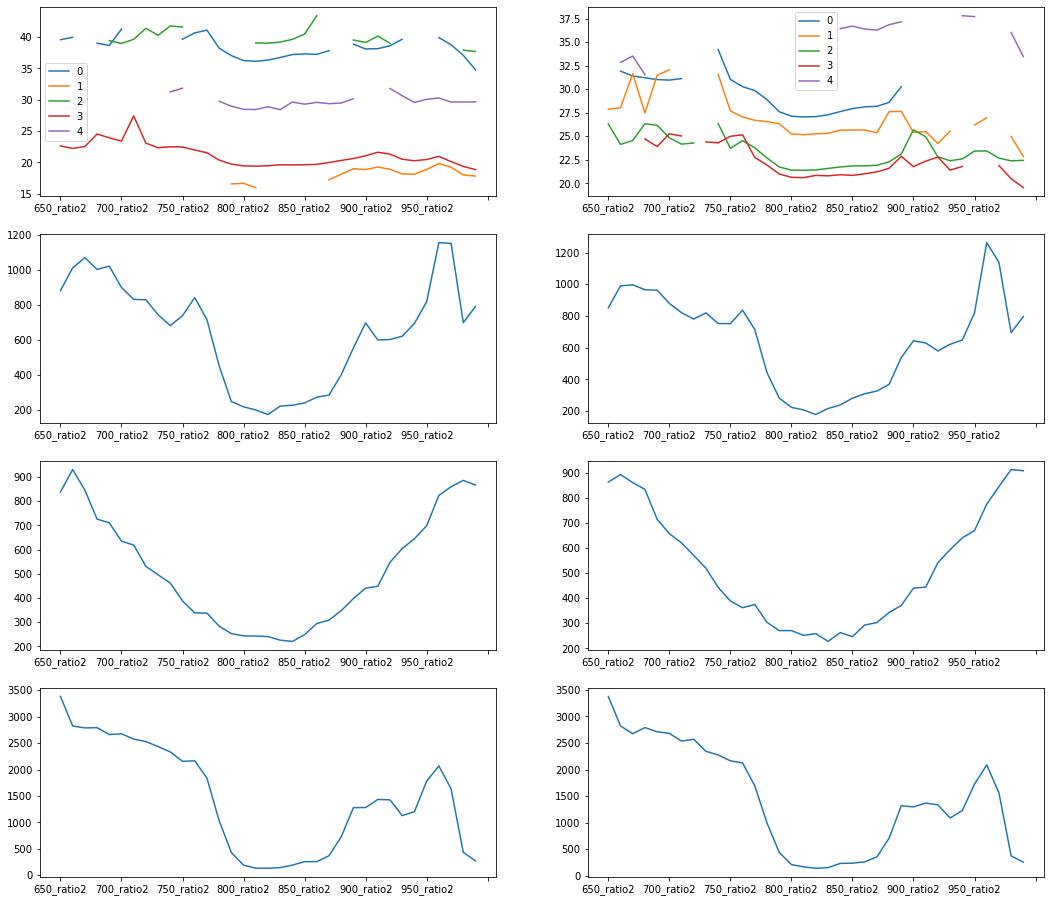

In [33]:
# ratio2의 그래프, 빈값, 음의 무한대, 양의 무한대
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train.filter(regex='_ratio2$', axis='columns').head().T.plot(ax=ax1)
test.filter(regex='_ratio2$', axis='columns').head().T.plot(ax=ax2)
train.filter(regex='_ratio2$', axis='columns').isnull().sum().plot(ax=ax3)
test.filter(regex='_ratio2$', axis='columns').isnull().sum().plot(ax=ax4)
train.filter(regex='_ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test.filter(regex='_ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train.filter(regex='_ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test.filter(regex='_ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

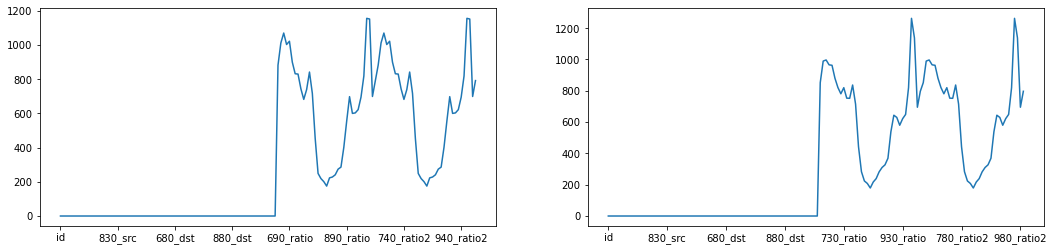

In [34]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)
train.isnull().sum().plot(ax=ax1)
test.isnull().sum().plot(ax=ax2)

In [35]:
# 음의 무한대와 양의 무한대를 np.nan로 변경
#train_r = train.filter(regex='_ratio$', axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)
#test_r = test.filter(regex='_ratio$', axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)

#train_r2 = train.filter(regex='_ratio2$', axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)
#test_r2 = test.filter(regex='_ratio2$', axis='columns').replace(float('-inf'), np.nan).replace(float('inf'), np.nan)

train_r = train.replace(float('-inf'), np.nan).replace(float('inf'), np.nan)
test_r = test.replace(float('-inf'), np.nan).replace(float('inf'), np.nan)

<AxesSubplot:>

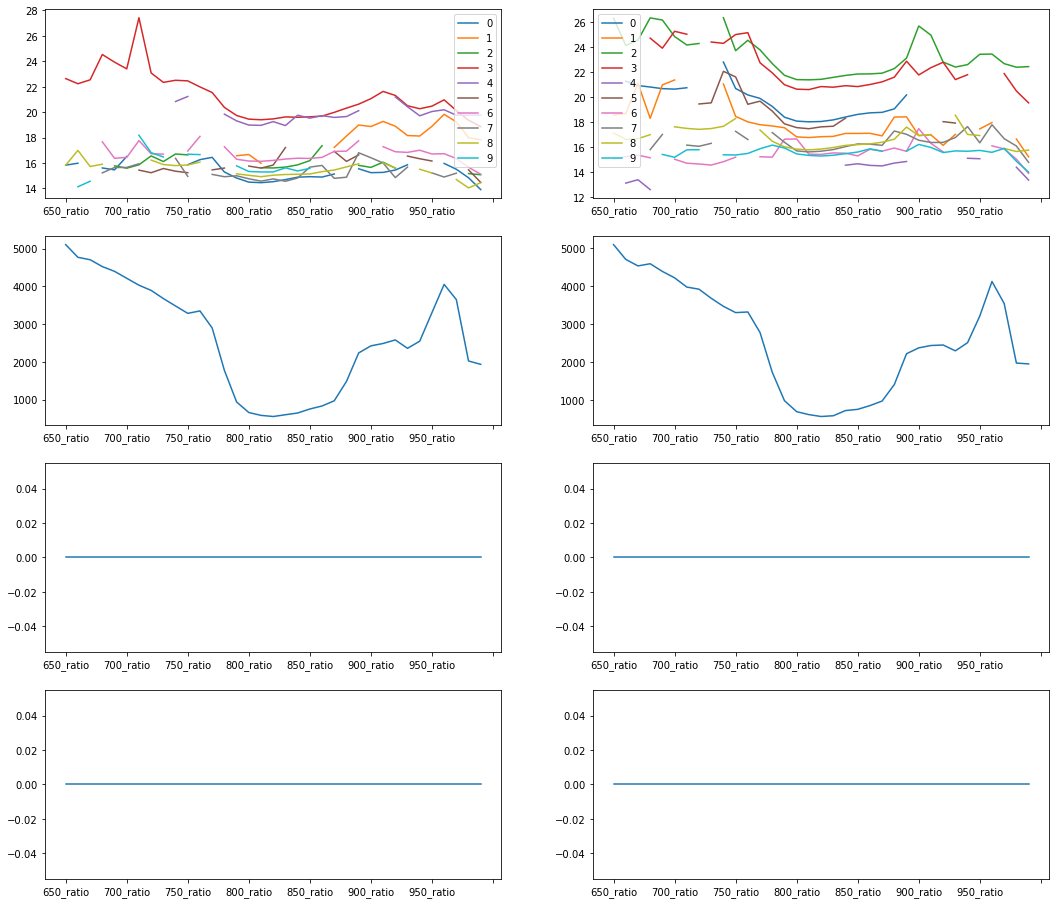

In [36]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r.filter(regex='_ratio$', axis='columns').head(10).T.plot(ax=ax1)
test_r.filter(regex='_ratio$', axis='columns').head(10).T.plot(ax=ax2)
train_r.filter(regex='_ratio$', axis='columns').isnull().sum().plot(ax=ax3)
test_r.filter(regex='_ratio$', axis='columns').isnull().sum().plot(ax=ax4)
train_r.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test_r.filter(regex='_ratio$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train_r.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test_r.filter(regex='_ratio$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

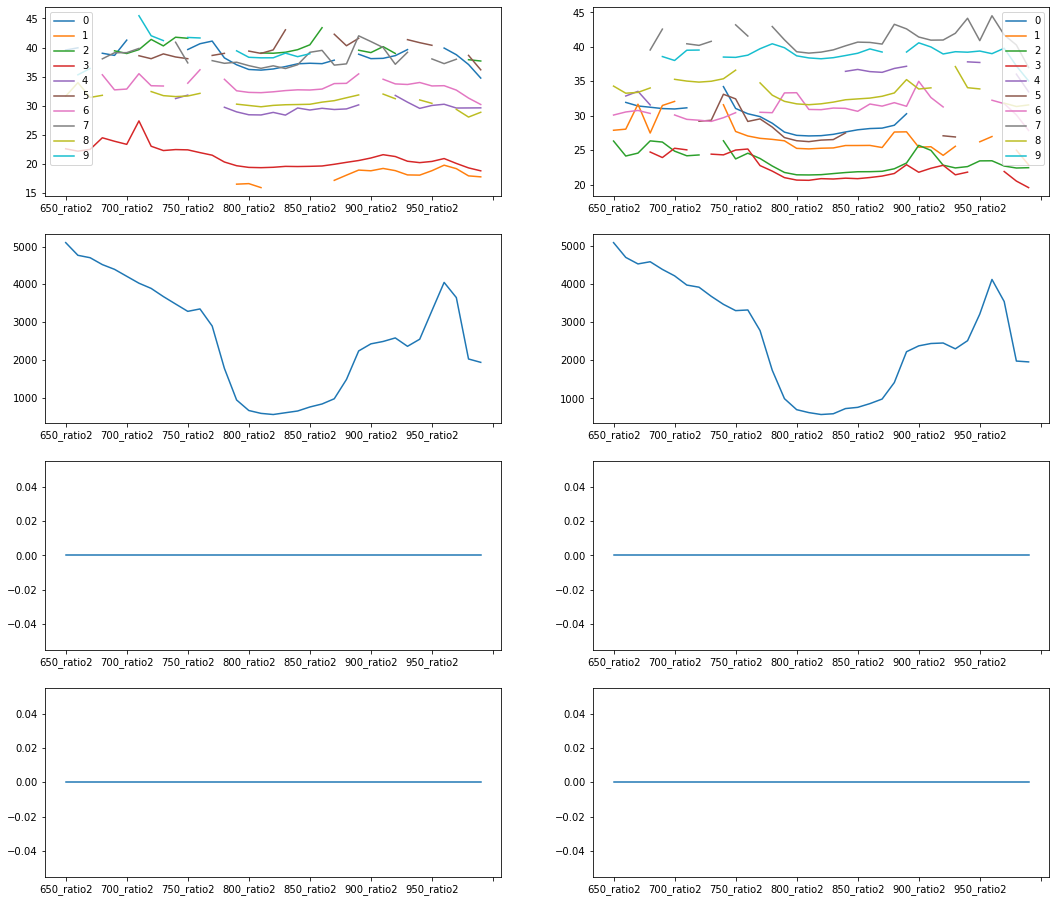

In [37]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r.filter(regex='_ratio2$', axis='columns').head(10).T.plot(ax=ax1)
test_r.filter(regex='_ratio2$', axis='columns').head(10).T.plot(ax=ax2)
train_r.filter(regex='_ratio2$', axis='columns').isnull().sum().plot(ax=ax3)
test_r.filter(regex='_ratio2$', axis='columns').isnull().sum().plot(ax=ax4)
train_r.filter(regex='_ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test_r.filter(regex='_ratio2$', axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train_r.filter(regex='_ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test_r.filter(regex='_ratio2$', axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

## A 컬럼 보간하기

In [38]:
# ratio와 ratio2간 인접한 컬럼끼리 보간되는 것을 막기 위해 분리함
train_r1 = train_r.filter(regex='_ratio$', axis='columns')
train_r2 = train_r.filter(regex='_ratio2$', axis='columns')

test_r1 = test_r.filter(regex='_ratio$', axis='columns')
test_r2 = test_r.filter(regex='_ratio2$', axis='columns')

In [39]:
# 문자열 컬럼을 숫자 컬렴으로 변경
train_r1.columns = list(650 + np.arange(35)*10)
train_r2.columns = list(650 + np.arange(35)*10)

test_r1.columns = list(650 + np.arange(35)*10)
test_r2.columns = list(650 + np.arange(35)*10)

In [40]:
# polynomial 보간
train_r1 = train_r1.interpolate(method='nearest', axis=1)
train_r2 = train_r2.interpolate(method='nearest', axis=1)

test_r1 = test_r1.interpolate(method='nearest', axis=1)
test_r2 = test_r2.interpolate(method='nearest', axis=1)

In [41]:
# linear 보간
train_r1 = train_r1.interpolate(method='linear', axis=1)
train_r2 = train_r2.interpolate(method='linear', axis=1)

test_r1 = test_r1.interpolate(method='linear', axis=1)
test_r2 = test_r2.interpolate(method='linear', axis=1)

In [42]:
# 숫자 컬럼을 문자열 컬럼으로 변경
train_r1.columns = train.filter(regex='_ratio$', axis='columns').columns
train_r2.columns = train.filter(regex='_ratio2$', axis='columns').columns

test_r1.columns = test.filter(regex='_ratio$', axis='columns').columns
test_r2.columns = test.filter(regex='_ratio2$', axis='columns').columns

test_r2.columns

Index(['650_ratio2', '660_ratio2', '670_ratio2', '680_ratio2', '690_ratio2',
       '700_ratio2', '710_ratio2', '720_ratio2', '730_ratio2', '740_ratio2',
       '750_ratio2', '760_ratio2', '770_ratio2', '780_ratio2', '790_ratio2',
       '800_ratio2', '810_ratio2', '820_ratio2', '830_ratio2', '840_ratio2',
       '850_ratio2', '860_ratio2', '870_ratio2', '880_ratio2', '890_ratio2',
       '900_ratio2', '910_ratio2', '920_ratio2', '930_ratio2', '940_ratio2',
       '950_ratio2', '960_ratio2', '970_ratio2', '980_ratio2', '990_ratio2'],
      dtype='object')

<AxesSubplot:>

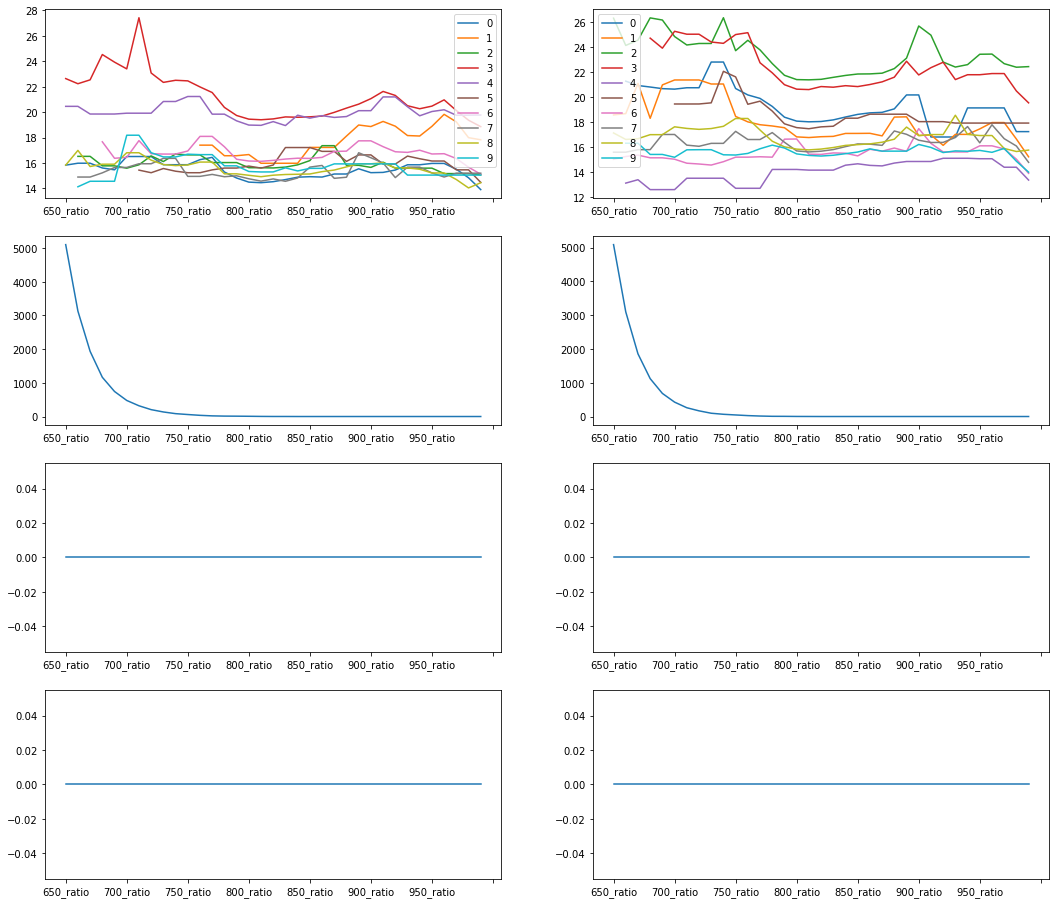

In [43]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r1.head(10).T.plot(ax=ax1)
test_r1.head(10).T.plot(ax=ax2)
train_r1.isnull().sum().plot(ax=ax3)
test_r1.isnull().sum().plot(ax=ax4)
train_r1.isin([float('-inf')]).sum().plot(ax=ax5)
test_r1.isin([float('-inf')]).sum().plot(ax=ax6)
train_r1.isin([float('inf')]).sum().plot(ax=ax7)
test_r1.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

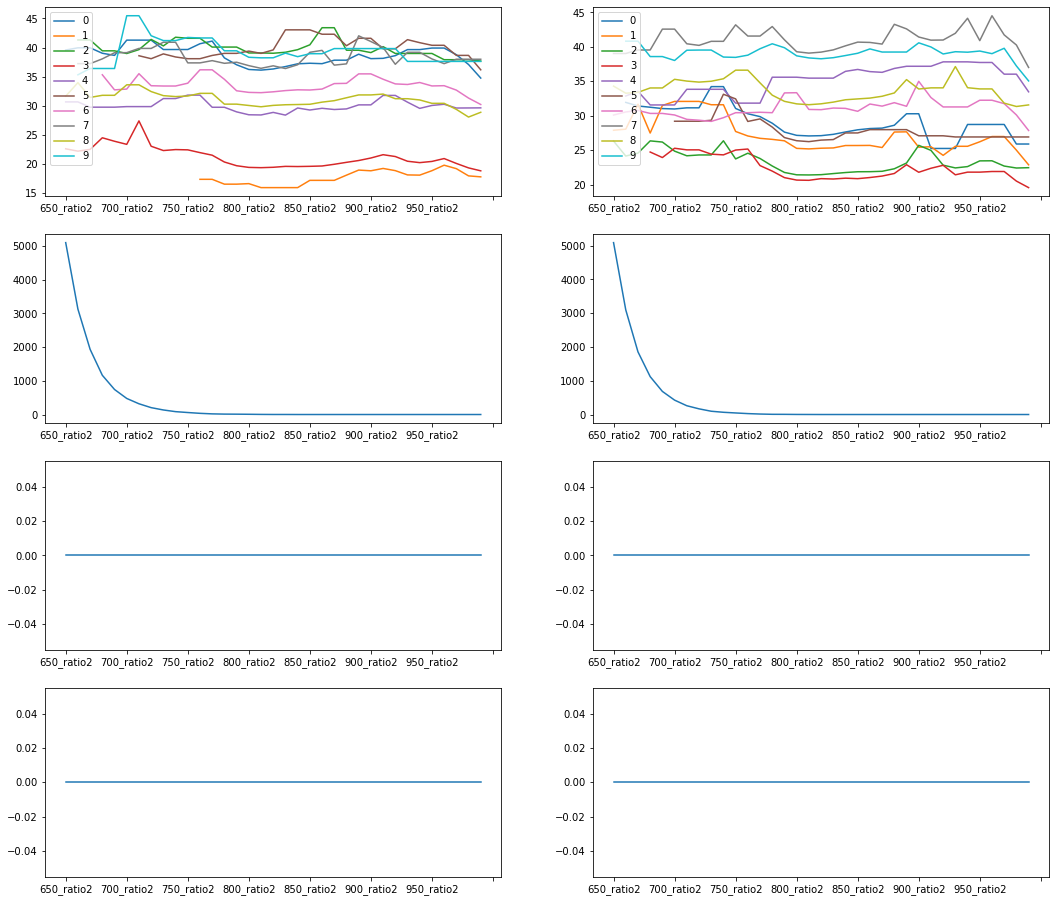

In [44]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r2.head(10).T.plot(ax=ax1)
test_r2.head(10).T.plot(ax=ax2)
train_r2.isnull().sum().plot(ax=ax3)
test_r2.isnull().sum().plot(ax=ax4)
train_r2.isin([float('-inf')]).sum().plot(ax=ax5)
test_r2.isin([float('-inf')]).sum().plot(ax=ax6)
train_r2.isin([float('inf')]).sum().plot(ax=ax7)
test_r2.isin([float('inf')]).sum().plot(ax=ax8)

In [45]:
# 오른쪽 보간
for i in range(34): # ratio
    train_r1.loc[train_r1[f'{980-(i*10)}_ratio'].isnull(),
                 f'{980-(i*10)}_ratio'] = train_r1.loc[train_r1[f'{980-(i*10)}_ratio'].isnull(),
                                                       f'{990-(i*10)}_ratio']
    test_r1.loc[test_r1[f'{980-(i*10)}_ratio'].isnull(),
                f'{980-(i*10)}_ratio'] = test_r1.loc[test_r1[f'{980-(i*10)}_ratio'].isnull(),
                                                     f'{990-(i*10)}_ratio']
for i in range(34): # ratio2
    train_r2.loc[train_r2[f'{980-(i*10)}_ratio2'].isnull(),
                 f'{980-(i*10)}_ratio2'] = train_r2.loc[train_r2[f'{980-(i*10)}_ratio2'].isnull(),
                                                        f'{990-(i*10)}_ratio2']
    test_r2.loc[test_r2[f'{980-(i*10)}_ratio2'].isnull(),
                f'{980-(i*10)}_ratio2'] = test_r2.loc[test_r2[f'{980-(i*10)}_ratio2'].isnull(),
                                                      f'{990-(i*10)}_ratio2']

<AxesSubplot:>

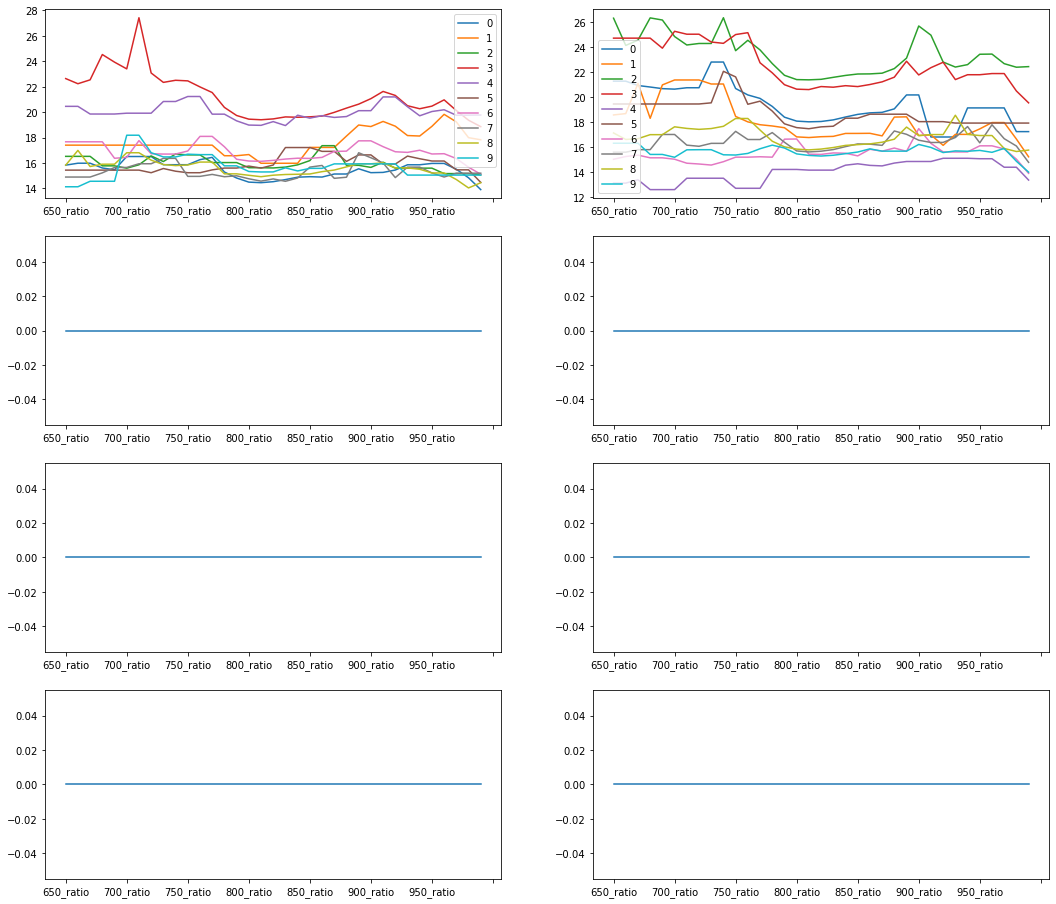

In [46]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r1.head(10).T.plot(ax=ax1)
test_r1.head(10).T.plot(ax=ax2)
train_r1.isnull().sum().plot(ax=ax3)
test_r1.isnull().sum().plot(ax=ax4)
train_r1.isin([float('-inf')]).sum().plot(ax=ax5)
test_r1.isin([float('-inf')]).sum().plot(ax=ax6)
train_r1.isin([float('inf')]).sum().plot(ax=ax7)
test_r1.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

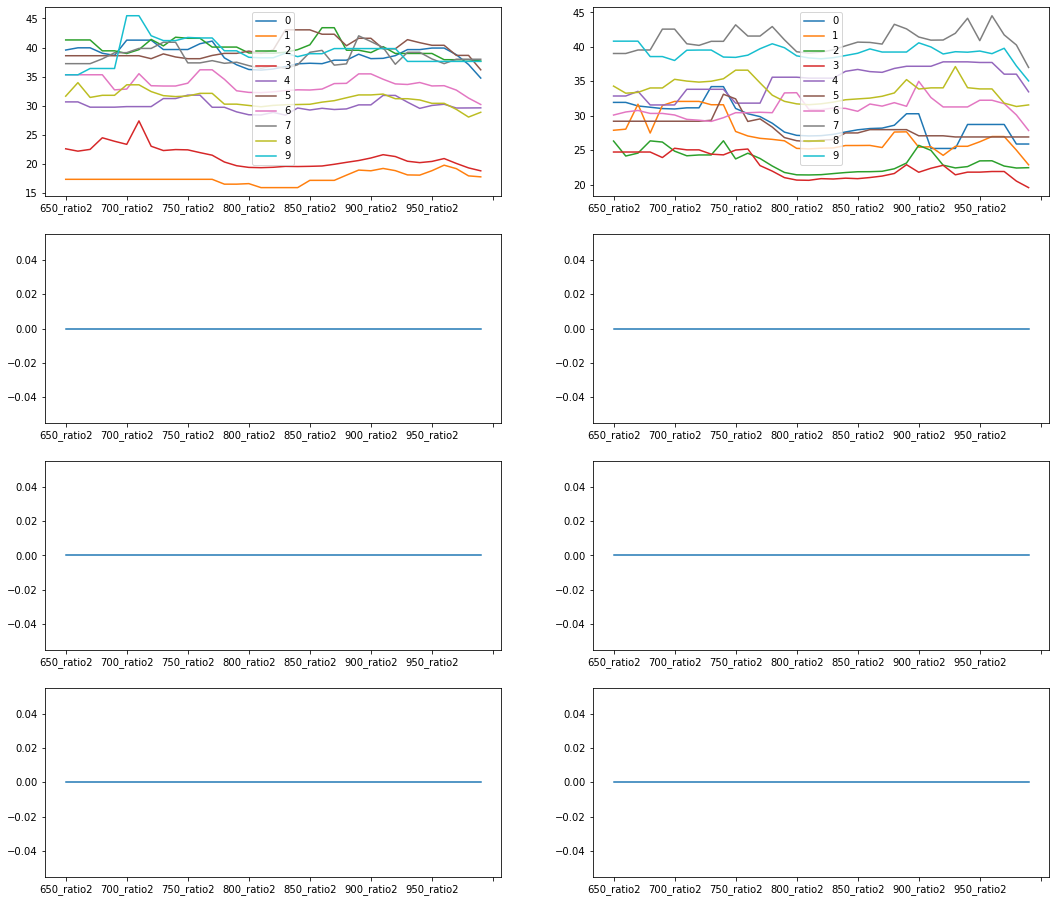

In [47]:
figure, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_r2.head(10).T.plot(ax=ax1)
test_r2.head(10).T.plot(ax=ax2)
train_r2.isnull().sum().plot(ax=ax3)
test_r2.isnull().sum().plot(ax=ax4)
train_r2.isin([float('-inf')]).sum().plot(ax=ax5)
test_r2.isin([float('-inf')]).sum().plot(ax=ax6)
train_r2.isin([float('inf')]).sum().plot(ax=ax7)
test_r2.isin([float('inf')]).sum().plot(ax=ax8)

<AxesSubplot:>

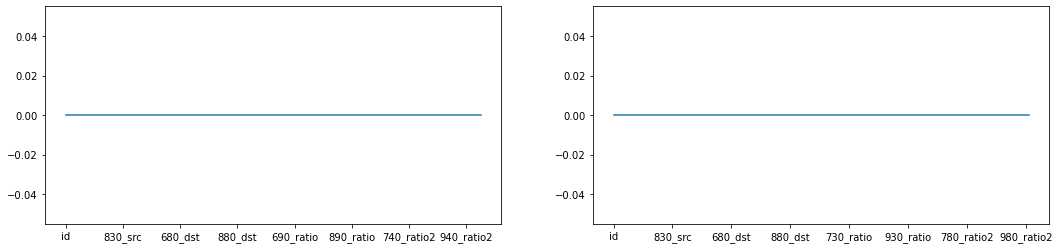

In [48]:
train.update(train_r1)
train.update(train_r2)

test.update(test_r1)
test.update(test_r2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

train.isnull().sum().plot(ax=ax1)
test.isnull().sum().plot(ax=ax2)

## 분석

In [49]:
train.columns

Index(['id', 'rho', '650_src', '660_src', '670_src', '680_src', '690_src',
       '700_src', '710_src', '720_src',
       ...
       '900_ratio2', '910_ratio2', '920_ratio2', '930_ratio2', '940_ratio2',
       '950_ratio2', '960_ratio2', '970_ratio2', '980_ratio2', '990_ratio2'],
      dtype='object', length=146)

<AxesSubplot:>

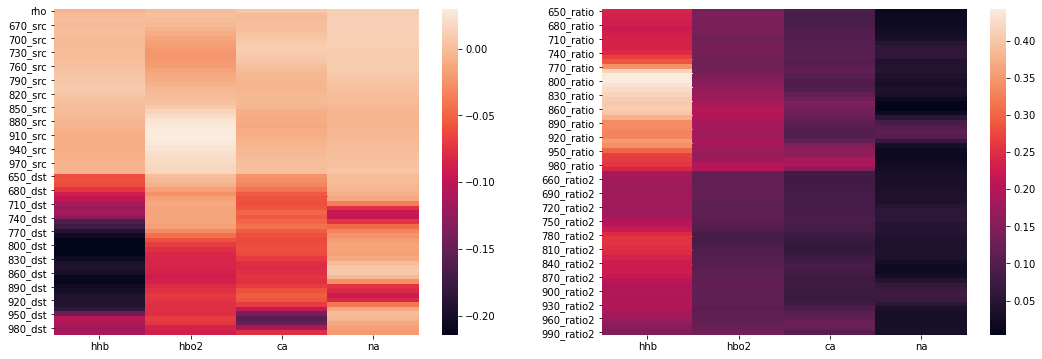

In [50]:
# src 컬럼이 불필요해 보임
# dst, ratio, ratio2 컬럼 모두 hhb 예측하는데 도움이 되나 ca, na 예측하는데는 효율성이 떨어져 보임
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['rho':'990_dst', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio':'990_ratio2', 'hhb':'na'], ax=ax2)

In [51]:
# 기존 Beer-Lambertt law: A = E*rho*농도
# Brain's Beer-Lambertt law: A = E*rho*농도*DPF + G
# G : Geometry(측정 대상의 기하학적인 구조)
# DPF : 입사한 빛이 매질을 뚫고 지나갈 때 경로의 평균 경로의 길이
# G랑 DPF도 구해야 한다
# 방법1 : 미분
# 방법2 :두 케이스를 빼서 G를 없애기

In [52]:
# 방법2 :두 케이스를 빼서 G를 없애기
# A = E*rho*농도*DPF + G
# DPF : 파장에 따라서 변함
# E : 파장에 따라서 변함
# G : 파장에 따라서 변하지 않음
# 대충 쓰자면 
#650_ratio = E*rho*농도*DPF + G
#750_ratio = E*rho*농도*DPF + G
#650_ratio - 750_ratio = E*rho*농도*DPF - E*rho*농도*DPF
#G 는 서로 같기 때문에 빼면 사라진다

In [53]:
# ca, na 농도 예측을 높일 수 있는 새로운 컬럼 찾는 것
# G 값 제거를 위해 ratio, ratio2 컬럼 파장 별로 빼기를 한 새로운 컬럼

# ratio 빼기
for i in range(35):
    train[f'{650+(10*i)}_ratio_diff'] = train[f'{650+(10*i)}_ratio'] - train['990_ratio']
    test[f'{650+(10*i)}_ratio_diff'] = test[f'{650+(10*i)}_ratio'] - test['990_ratio']

for i in range(35):
    train[f'{650+(10*i)}_ratio_diff2'] = train[f'{650+(10*i)}_ratio'] - (train['850_ratio']+train['860_ratio'])/2
    test[f'{650+(10*i)}_ratio_diff2'] = test[f'{650+(10*i)}_ratio'] - (test['850_ratio']+test['860_ratio'])/2

In [54]:
# ratio2 빼기
for i in range(35):
    train[f'{650+(10*i)}_ratio2_diff'] = train[f'{650+(10*i)}_ratio2'] - train['810_ratio2']
    test[f'{650+(10*i)}_ratio2_diff'] = test[f'{650+(10*i)}_ratio2'] - test['810_ratio2']

<AxesSubplot:>

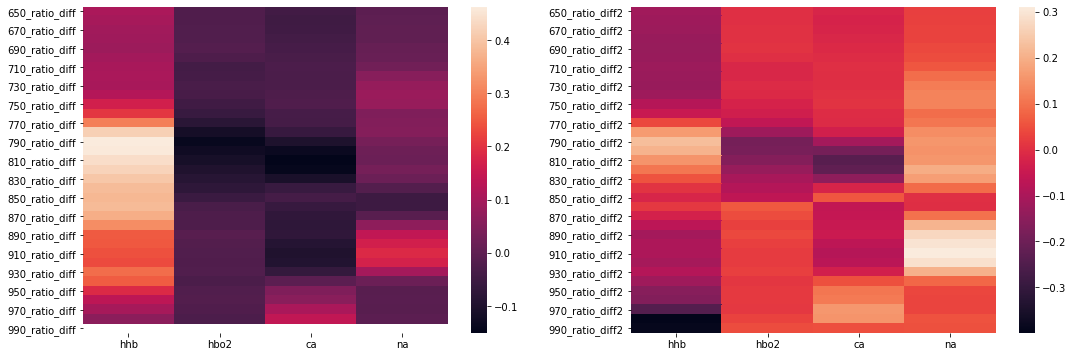

In [55]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff':'990_ratio_diff', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff2':'990_ratio_diff2', 'hhb':'na'], ax=ax2)

<AxesSubplot:>

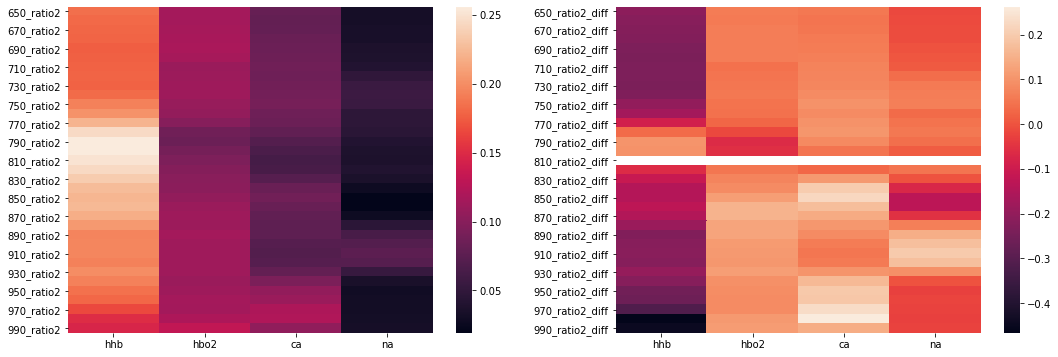

In [56]:
# ratio2_diff 컬럼은 ca 농도 예측에 도움이 될 것으로 예상됨
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio2':'990_ratio2', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio2_diff':'990_ratio2_diff', 'hhb':'na'], ax=ax2)

In [57]:
# 빼기 컬럼을 만들어 해보세요. 790~830_ratio 범위를 빼보세요

for i in range(5):
    for j in range(35):
        train[f'{650+(10*j)}_ratio_diff_tt{790+(10*i)}'] = train[f'{650+(10*j)}_ratio'] - train[f'{790+(10*i)}_ratio']
        test[f'{650+(10*j)}_ratio_diff_tt{790+(10*i)}'] = train[f'{650+(10*j)}_ratio'] - train[f'{790+(10*i)}_ratio']

for i in range(5):
    for j in range(35):
        train[f'{650+(10*j)}_ratio_diff_ttt{i}'] = train[f'{650+(10*j)}_ratio'] - (train[f'{790+(10*i)}_ratio']+train[f'{800+(10*i)}_ratio'])/2
        test[f'{650+(10*j)}_ratio_diff_ttt{i}'] = train[f'{650+(10*j)}_ratio'] - (test[f'{790+(10*i)}_ratio']+test[f'{800+(10*i)}_ratio'])/2

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt790':'990_ratio_diff_tt790', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt0':'990_ratio_diff_ttt0', 'hhb':'na'], ax=ax2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt800':'990_ratio_diff_tt800', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt1':'990_ratio_diff_ttt1', 'hhb':'na'], ax=ax2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt810':'990_ratio_diff_tt810', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt2':'990_ratio_diff_ttt2', 'hhb':'na'], ax=ax2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt820':'990_ratio_diff_tt820', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt2':'990_ratio_diff_ttt2', 'hhb':'na'], ax=ax2)

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_diff_tt830':'990_ratio_diff_tt830', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff_ttt3':'990_ratio_diff_ttt3', 'hhb':'na'], ax=ax2)

In [58]:
# 강사님 하신 방법
for i in range(35):
    train[f'{650+(10*i)}_ratio_diff3'] = train[f'{650+(10*i)}_ratio'] - (train['810_ratio']+train['820_ratio'])/2
    test[f'{650+(10*i)}_ratio_diff3'] = train[f'{650+(10*i)}_ratio'] - (test['810_ratio']+test['820_ratio'])/2
for i in range(35):
    train[f'{650+(10*i)}_ratio_diff4'] = train[f'{650+(10*i)}_ratio'] - (train['800_ratio']+train['810_ratio'])/2
    test[f'{650+(10*i)}_ratio_diff4'] = train[f'{650+(10*i)}_ratio'] - (test['800_ratio']+test['810_ratio'])/2

In [59]:
for i in range(35):
    train[f'{650+(10*i)}_ratio_diff5'] = train[f'{650+(10*i)}_ratio'] - train['820_ratio']
    test[f'{650+(10*i)}_ratio_diff5'] = train[f'{650+(10*i)}_ratio'] - test['820_ratio']
for i in range(35):   
    train[f'{650+(10*i)}_ratio_diff6'] = train[f'{650+(10*i)}_ratio'] - train['790_ratio']
    test[f'{650+(10*i)}_ratio_diff6'] = train[f'{650+(10*i)}_ratio'] - test['790_ratio']
for i in range(35):   
    train[f'{650+(10*i)}_ratio_diff7'] = train[f'{650+(10*i)}_ratio'] - train['840_ratio']
    test[f'{650+(10*i)}_ratio_diff7'] = train[f'{650+(10*i)}_ratio'] - test['840_ratio']

<AxesSubplot:>

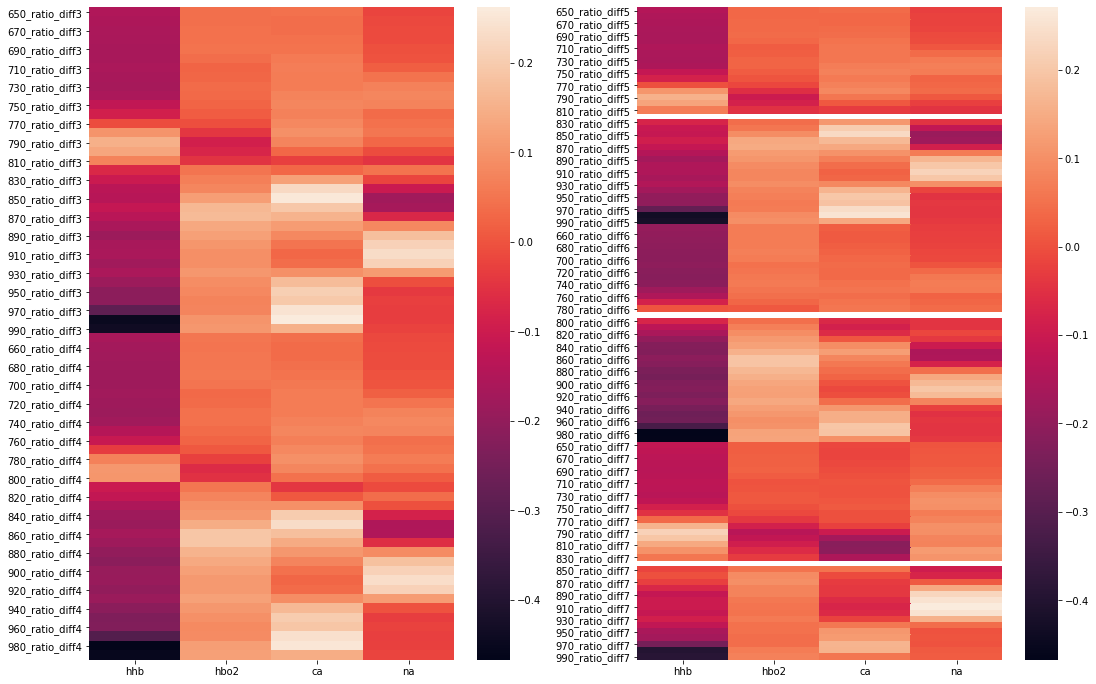

In [60]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,12)
sns.heatmap(train.corr().loc['650_ratio_diff3':'990_ratio_diff4', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_diff5':'990_ratio_diff7', 'hhb':'na'], ax=ax2)

In [61]:
# (E*rho*농도*DPF + G) / (A 컬럼 평균)
# 비율로 나누면 편차가 줄어든다

In [62]:
# ratio를 평균과 나눠서 그 비율로 새로운 컬럼 생성
# 노이즈나 이상치의 영향을 줄여주는 효과
# 많은 회수의 반복문을 쓸 경우tqdm을 사용하면 계산 시간을 10분의 1까지 줄일 수 있음
train_ratio = train.filter(regex='_ratio$', axis='columns')
test_ratio = test.filter(regex='_ratio$', axis='columns')

for i in tqdm(train_ratio.index):
    train_ratio.loc[i] = train_ratio.loc[i] / train_ratio.loc[i].replace(0, np.nan).mean()
    
for i in tqdm(train_ratio.index):
    test_ratio.loc[i] = test_ratio.loc[i] / test_ratio.loc[i].replace(0, np.nan).mean()
    
for i in range(35):
    train[f'{650+(10*i)}_ratio_m'] = train_ratio[f'{650+(10*i)}_ratio']
    test[f'{650+(10*i)}_ratio_m'] = test_ratio[f'{650+(10*i)}_ratio']

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1773.18it/s]


<AxesSubplot:>

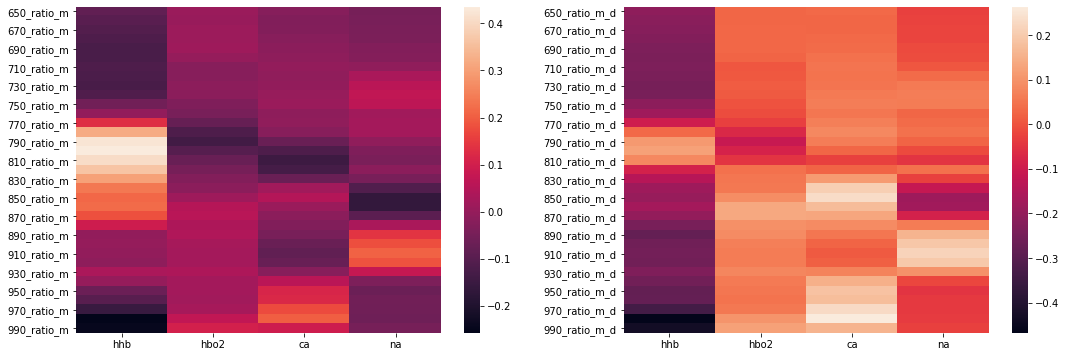

In [63]:
for i in range(35):
    train[f'{650+(10*i)}_ratio_m_d'] = train[f'{650+(10*i)}_ratio_m'] - (train['810_ratio_m']+train['820_ratio_m'])/2
    test[f'{650+(10*i)}_ratio_m_d'] = test[f'{650+(10*i)}_ratio_m'] - (test['810_ratio_m']+test['820_ratio_m'])/2
    
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_ratio_m':'990_ratio_m', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_ratio_m_d':'990_ratio_m_d', 'hhb':'na'], ax=ax2)

In [64]:
# dst를 평균 dst값으로 나눈 새로운 컬럼을 만들어보세요
# 새로운 컬럼의 850과 860 평균을 뺀 컬럼을 만들어 보세요

In [65]:
train_ratio = train.filter(regex='_dst$', axis='columns')
test_ratio = test.filter(regex='_dst$', axis='columns')

for i in tqdm(train_dst.index):
    train_ratio.loc[i] = train_ratio.loc[i] / train_ratio.loc[i].replace(0, np.nan).mean()
    
for i in tqdm(test_dst.index):
    test_ratio.loc[i] = test_ratio.loc[i] / test_ratio.loc[i].replace(0, np.nan).mean()
    
for i in range(35):
    train[f'{650+(10*i)}_dst_m'] = train_ratio[f'{650+(10*i)}_dst']
    test[f'{650+(10*i)}_dst_m'] = test_ratio[f'{650+(10*i)}_dst']

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1711.60it/s]


<AxesSubplot:>

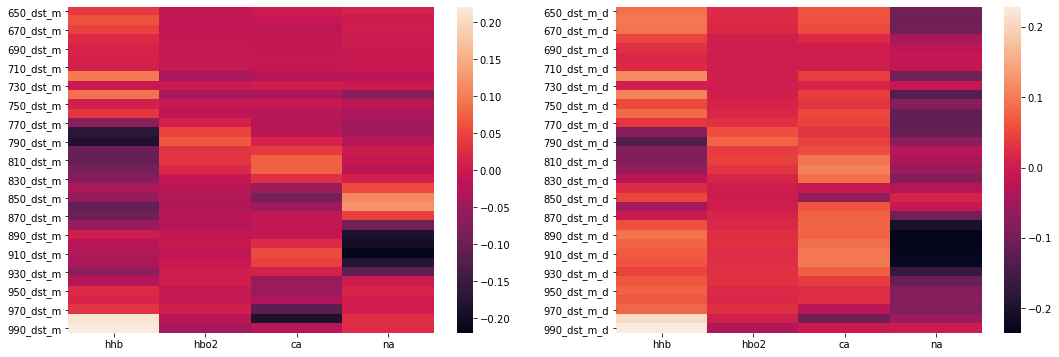

In [66]:
for i in range(35):
    train[f'{650+(10*i)}_dst_m_d'] = train[f'{650+(10*i)}_dst_m'] - (train['850_dst_m']+train['860_dst_m'])/2
    test[f'{650+(10*i)}_dst_m_d'] = test[f'{650+(10*i)}_dst_m'] - (test['850_dst_m']+test['860_dst_m'])/2
    
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_dst_m':'990_dst_m', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_dst_m_d':'990_dst_m_d', 'hhb':'na'], ax=ax2)

<AxesSubplot:>

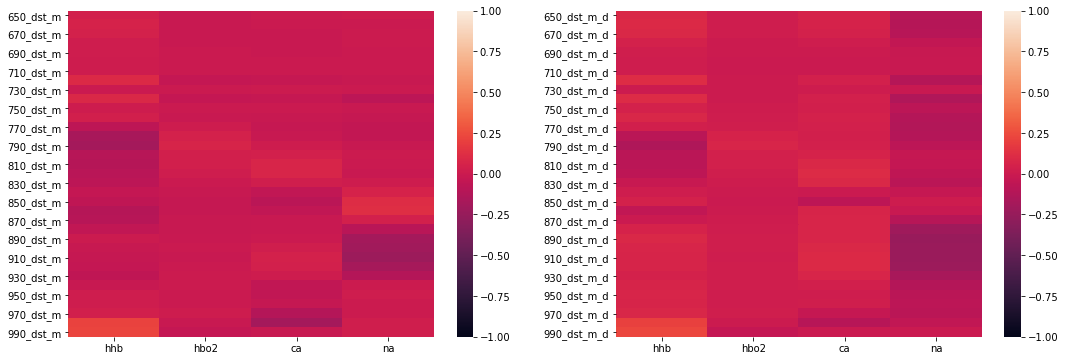

In [67]:
# 최솟값, 최댓값을 넣어서 컬러바 범위를 동일하게 만들기
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,6)
sns.heatmap(train.corr().loc['650_dst_m':'990_dst_m', 'hhb':'na'], vmin=-1, vmax=1, ax=ax1)
sns.heatmap(train.corr().loc['650_dst_m_d':'990_dst_m_d', 'hhb':'na'], vmin=-1, vmax=1, ax=ax2)

## Rolling

In [68]:
# 롤링, 이동평균은 전체 데이터 집합의 여러 하위 집합에 대한
# 일련의 평균을 만들어 데이터 요소를 분석하는 계산
# 800_ratio를 플마 2칸 기준 롤링을 하면
# 780_ratio, 790_ratio, 800_ratio, 810_ratio, 820_ratio / 5 = 800_ratio_rolling_2
# 그 다음은 790_ratio, 800_ratio, 810_ratio, 820_ratio, 830_ratio / 5 = 810_ratio_rolling_2
# 이런 식 전체 평균으로 나누는 것 보다는 조금 더 디테일 하게

In [69]:
# 범위가 +-2인 경우
for i in range(35):
    if i == 0:
        train[f'{650+(10*i)}_src_rm'] = (train[f'{650+(10*i)}_src']+train[f'{660+(10*i)}_src']+train[f'{670+(10*i)}_src'])/3
        train[f'{650+(10*i)}_dst_rm'] = (train[f'{650+(10*i)}_dst']+train[f'{660+(10*i)}_dst']+train[f'{670+(10*i)}_dst'])/3
        
        test[f'{650+(10*i)}_src_rm'] = (test[f'{650+(10*i)}_src']+test[f'{660+(10*i)}_src']+test[f'{670+(10*i)}_src'])/3
        test[f'{650+(10*i)}_dst_rm'] = (test[f'{650+(10*i)}_dst']+test[f'{660+(10*i)}_dst']+test[f'{670+(10*i)}_dst'])/3
        
        train[f'{650+(10*i)}_rolling_2'] = np.log(train[f'{650+(10*i)}_src_rm']/train[f'{650+(10*i)}_dst_rm']) / (0.1*train['rho'])
        test[f'{650+(10*i)}_rolling_2'] = np.log(test[f'{650+(10*i)}_src_rm']/test[f'{650+(10*i)}_dst_rm']) / (0.1*test['rho'])
        
    if i == 1 :
        train[f'{650+(10*i)}_src_rm'] = (train[f'{640+(10*i)}_src']+train[f'{650+(10*i)}_src']+train[f'{660+(10*i)}_src']+train[f'{670+(10*i)}_src'])/4
        train[f'{650+(10*i)}_dst_rm'] = (train[f'{640+(10*i)}_dst']+train[f'{650+(10*i)}_dst']+train[f'{660+(10*i)}_dst']+train[f'{670+(10*i)}_dst'])/4
        
        test[f'{650+(10*i)}_src_rm'] = (test[f'{640+(10*i)}_src']+test[f'{650+(10*i)}_src']+test[f'{660+(10*i)}_src']+test[f'{670+(10*i)}_src'])/4
        test[f'{650+(10*i)}_dst_rm'] = (test[f'{640+(10*i)}_dst']+test[f'{650+(10*i)}_dst']+test[f'{660+(10*i)}_dst']+test[f'{670+(10*i)}_dst'])/4
        
        train[f'{650+(10*i)}_rolling_2'] = np.log(train[f'{650+(10*i)}_src_rm']/train[f'{650+(10*i)}_dst_rm']) / (0.1*train['rho'])
        test[f'{650+(10*i)}_rolling_2'] = np.log(test[f'{650+(10*i)}_src_rm']/test[f'{650+(10*i)}_dst_rm']) / (0.1*test['rho'])
        
    if (i > 1) and (i < 33) :
        train[f'{650+(10*i)}_src_rm'] = (train[f'{630+(10*i)}_src']+train[f'{640+(10*i)}_src']+train[f'{650+(10*i)}_src']+train[f'{660+(10*i)}_src']+train[f'{670+(10*i)}_src'])/5
        train[f'{650+(10*i)}_dst_rm'] = (train[f'{630+(10*i)}_dst']+train[f'{640+(10*i)}_dst']+train[f'{650+(10*i)}_dst']+train[f'{660+(10*i)}_dst']+train[f'{670+(10*i)}_dst'])/5
        
        test[f'{650+(10*i)}_src_rm'] = (test[f'{630+(10*i)}_src']+test[f'{640+(10*i)}_src']+test[f'{650+(10*i)}_src']+test[f'{660+(10*i)}_src']+test[f'{670+(10*i)}_src'])/5
        test[f'{650+(10*i)}_dst_rm'] = (test[f'{630+(10*i)}_dst']+test[f'{640+(10*i)}_dst']+test[f'{650+(10*i)}_dst']+test[f'{660+(10*i)}_dst']+test[f'{670+(10*i)}_dst'])/5
        
        train[f'{650+(10*i)}_rolling_2'] = np.log(train[f'{650+(10*i)}_src_rm']/train[f'{650+(10*i)}_dst_rm']) / (0.1*train['rho'])
        test[f'{650+(10*i)}_rolling_2'] = np.log(test[f'{650+(10*i)}_src_rm']/test[f'{650+(10*i)}_dst_rm']) / (0.1*test['rho'])
        
    if i == 33 :
        train[f'{650+(10*i)}_src_rm'] = (train[f'{630+(10*i)}_src']+train[f'{640+(10*i)}_src']+train[f'{650+(10*i)}_src']+train[f'{660+(10*i)}_src'])/4
        train[f'{650+(10*i)}_dst_rm'] = (train[f'{630+(10*i)}_dst']+train[f'{640+(10*i)}_dst']+train[f'{650+(10*i)}_dst']+train[f'{660+(10*i)}_dst'])/4
        
        test[f'{650+(10*i)}_src_rm'] = (test[f'{630+(10*i)}_src']+test[f'{640+(10*i)}_src']+test[f'{650+(10*i)}_src']+test[f'{660+(10*i)}_src'])/4
        test[f'{650+(10*i)}_dst_rm'] = (test[f'{630+(10*i)}_dst']+test[f'{640+(10*i)}_dst']+test[f'{650+(10*i)}_dst']+test[f'{660+(10*i)}_dst'])/4
        
        train[f'{650+(10*i)}_rolling_2'] = np.log(train[f'{650+(10*i)}_src_rm']/train[f'{650+(10*i)}_dst_rm']) / (0.1*train['rho'])
        test[f'{650+(10*i)}_rolling_2'] = np.log(test[f'{650+(10*i)}_src_rm']/test[f'{650+(10*i)}_dst_rm']) / (0.1*test['rho'])
        
    if i == 34 :
        train[f'{650+(10*i)}_src_rm'] = (train[f'{630+(10*i)}_src']+train[f'{640+(10*i)}_src']+train[f'{650+(10*i)}_src'])/3
        train[f'{650+(10*i)}_dst_rm'] = (train[f'{630+(10*i)}_dst']+train[f'{640+(10*i)}_dst']+train[f'{650+(10*i)}_dst'])/3
        
        test[f'{650+(10*i)}_src_rm'] = (test[f'{630+(10*i)}_src']+test[f'{640+(10*i)}_src']+test[f'{650+(10*i)}_src'])/3
        test[f'{650+(10*i)}_dst_rm'] = (test[f'{630+(10*i)}_dst']+test[f'{640+(10*i)}_dst']+test[f'{650+(10*i)}_dst'])/3
        
        train[f'{650+(10*i)}_rolling_2'] = np.log(train[f'{650+(10*i)}_src_rm']/train[f'{650+(10*i)}_dst_rm']) / (0.1*train['rho'])
        test[f'{650+(10*i)}_rolling_2'] = np.log(test[f'{650+(10*i)}_src_rm']/test[f'{650+(10*i)}_dst_rm']) / (0.1*test['rho'])

<AxesSubplot:>

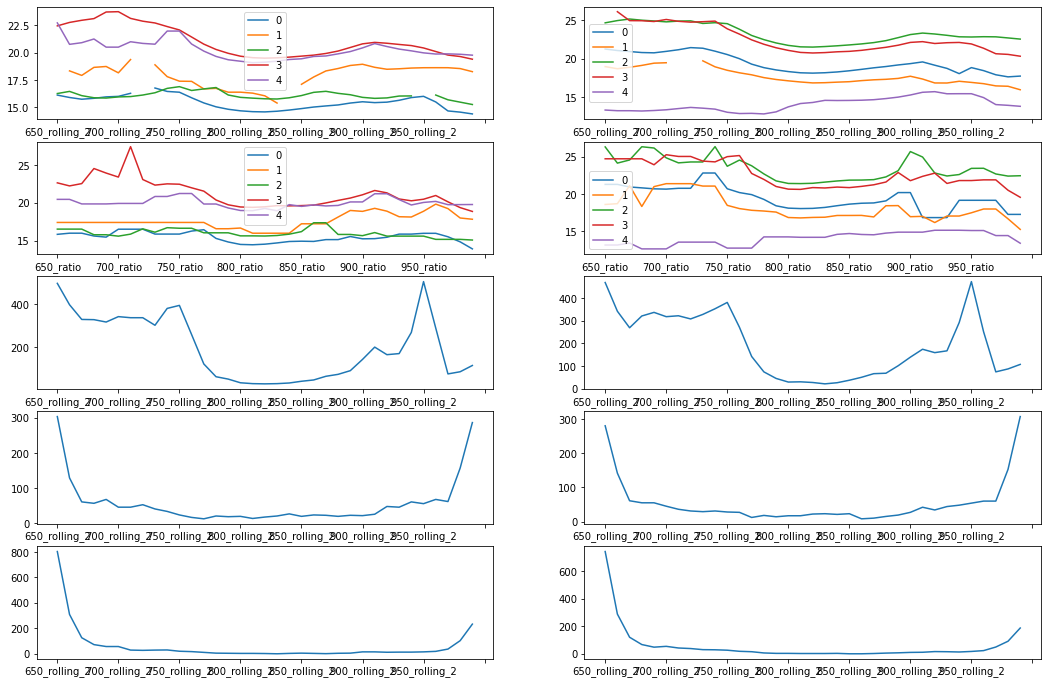

In [70]:
figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(18,12)
train.filter(regex='_rolling_2$',axis='columns').head().T.plot(ax=ax1)
test.filter(regex='_rolling_2$',axis='columns').head().T.plot(ax=ax2)
train.filter(regex='_ratio$',axis='columns').head().T.plot(ax=ax3)
test.filter(regex='_ratio$',axis='columns').head().T.plot(ax=ax4)
train.filter(regex='_rolling_2$',axis='columns').isnull().sum().plot(ax=ax5)
test.filter(regex='_rolling_2$',axis='columns').isnull().sum().plot(ax=ax6)
train.filter(regex='_rolling_2$',axis='columns').isin([float('-inf')]).sum().plot(ax=ax7)
test.filter(regex='_rolling_2$',axis='columns').isin([float('-inf')]).sum().plot(ax=ax8)
train.filter(regex='_rolling_2$',axis='columns').isin([float('inf')]).sum().plot(ax=ax9)
test.filter(regex='_rolling_2$',axis='columns').isin([float('inf')]).sum().plot(ax=ax10)

In [72]:
# nearest, linear 보간
# 무한을 빈 값으로 변환
train_roll2 = train.filter(regex='_rolling_2$', axis = 'columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)
test_roll2 = test.filter(regex='_rolling_2$', axis = 'columns').replace(float('-inf'),np.nan).replace(float('inf'),np.nan)
#문자열 컬럼을 숫자 컬럼으로 변환
train_roll2.columns = list(650+10*np.arange(35))
test_roll2.columns = list(650+10*np.arange(35))
#nearest 보간
train_roll2 = train_roll2.interpolate(method='nearest', axis=1)
test_roll2 = test_roll2.interpolate(method='nearest', axis=1)
#linear 보간
train_roll2 = train_roll2.interpolate(method='linear', axis=1)
test_roll2 = test_roll2.interpolate(method='linear', axis=1)
# 숫자 컬럼을 문자열 컬럼으로 변환
train_roll2.columns = train.filter(regex='_rolling_2$', axis = 'columns').columns
test_roll2.columns = test.filter(regex='_rolling_2$', axis = 'columns').columns

print(train_roll2.columns)
print(test_roll2.columns)

Index(['650_rolling_2', '660_rolling_2', '670_rolling_2', '680_rolling_2',
       '690_rolling_2', '700_rolling_2', '710_rolling_2', '720_rolling_2',
       '730_rolling_2', '740_rolling_2', '750_rolling_2', '760_rolling_2',
       '770_rolling_2', '780_rolling_2', '790_rolling_2', '800_rolling_2',
       '810_rolling_2', '820_rolling_2', '830_rolling_2', '840_rolling_2',
       '850_rolling_2', '860_rolling_2', '870_rolling_2', '880_rolling_2',
       '890_rolling_2', '900_rolling_2', '910_rolling_2', '920_rolling_2',
       '930_rolling_2', '940_rolling_2', '950_rolling_2', '960_rolling_2',
       '970_rolling_2', '980_rolling_2', '990_rolling_2'],
      dtype='object')
Index(['650_rolling_2', '660_rolling_2', '670_rolling_2', '680_rolling_2',
       '690_rolling_2', '700_rolling_2', '710_rolling_2', '720_rolling_2',
       '730_rolling_2', '740_rolling_2', '750_rolling_2', '760_rolling_2',
       '770_rolling_2', '780_rolling_2', '790_rolling_2', '800_rolling_2',
       '810_rolling

<AxesSubplot:>

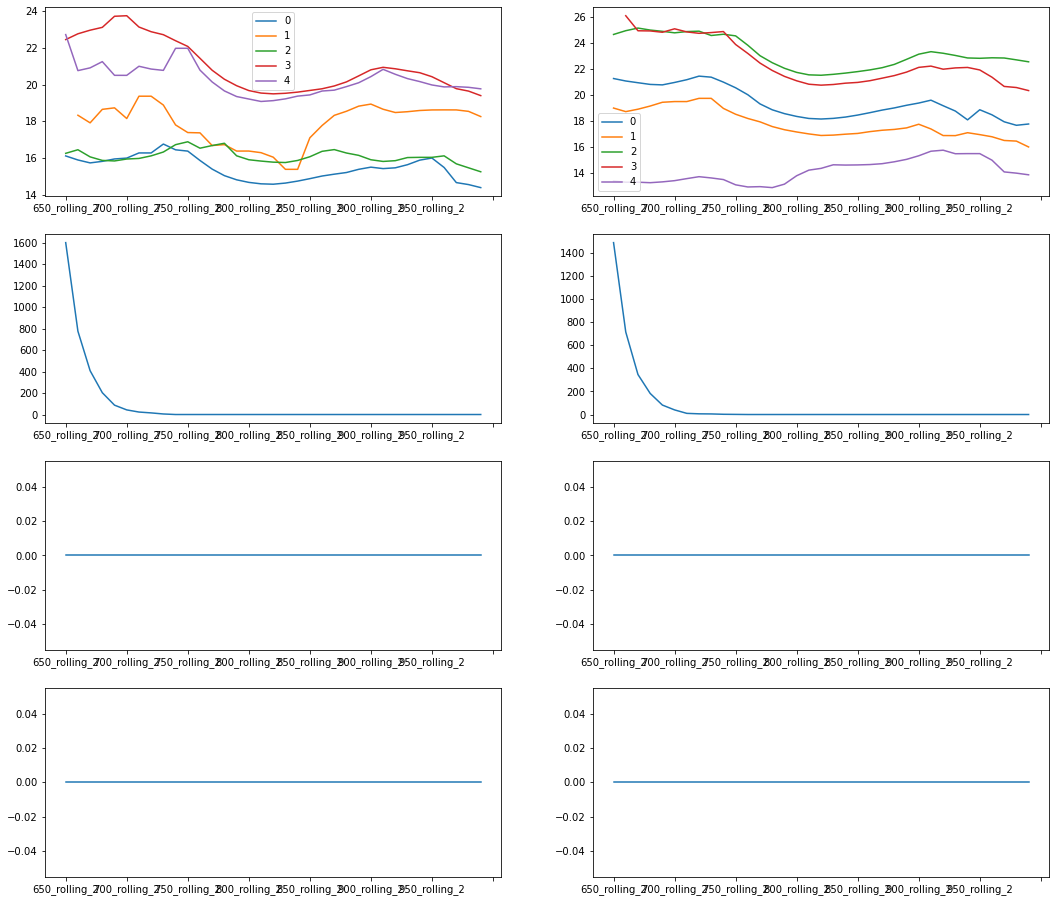

In [90]:
figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_roll2.filter(regex='_rolling_2$',axis='columns').head().T.plot(ax=ax1)
test_roll2.filter(regex='_rolling_2$',axis='columns').head().T.plot(ax=ax2)
train_roll2.filter(regex='_rolling_2$',axis='columns').isnull().sum().plot(ax=ax3)
test_roll2.filter(regex='_rolling_2$',axis='columns').isnull().sum().plot(ax=ax4)
train_roll2.filter(regex='_rolling_2$',axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test_roll2.filter(regex='_rolling_2$',axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train_roll2.filter(regex='_rolling_2$',axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test_roll2.filter(regex='_rolling_2$',axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

In [91]:
# 오른쪽 보간
for i in range(34) :
    train_roll2.loc[train_roll2[f'{980-(i*10)}_rolling_2'].isnull(),
                    f'{980-(i*10)}_rolling_2'] = train_roll2.loc[train_roll2[f'{980-(i*10)}_rolling_2'].isnull(), 
                                                                 f'{990-(i*10)}_rolling_2']
    test_roll2.loc[test_roll2[f'{980-(i*10)}_rolling_2'].isnull(),
                   f'{980-(i*10)}_rolling_2'] = test_roll2.loc[test_roll2[f'{980-(i*10)}_rolling_2'].isnull(), 
                                                               f'{990-(i*10)}_rolling_2']

<AxesSubplot:>

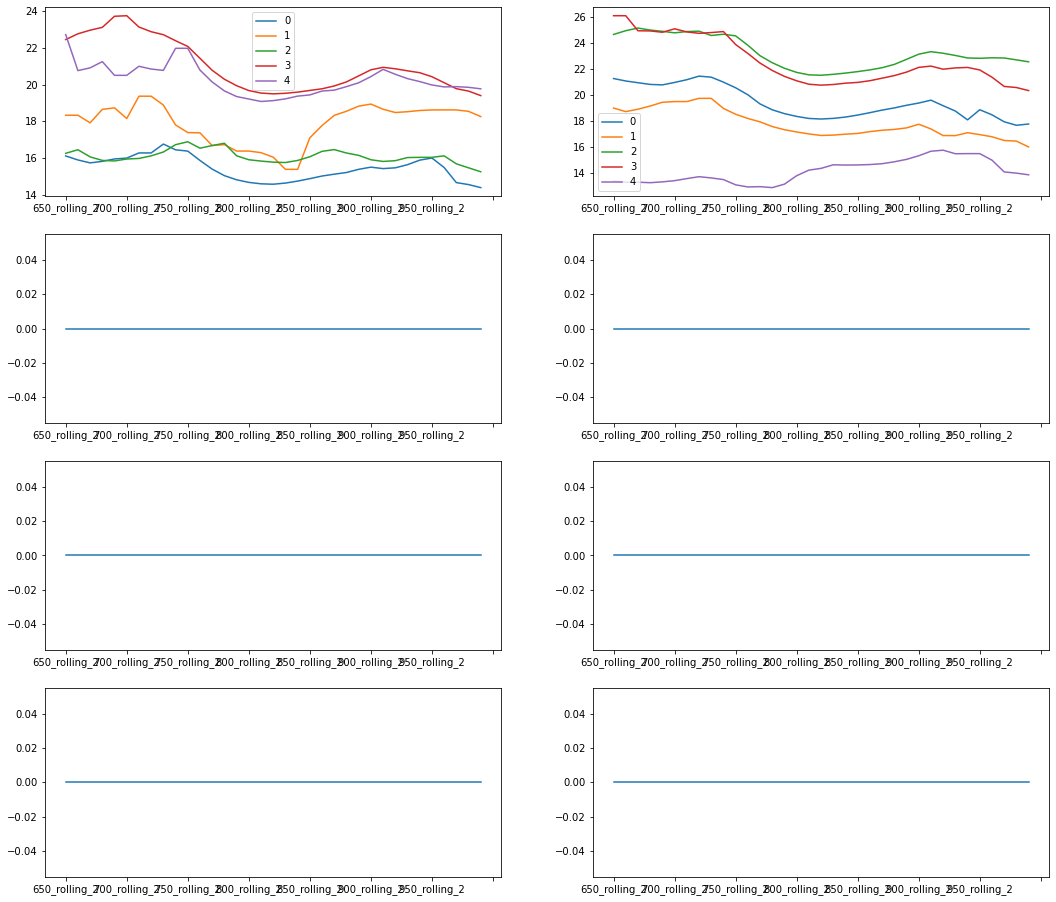

In [92]:
figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
figure.set_size_inches(18,16)
train_roll2.filter(regex='_rolling_2$',axis='columns').head().T.plot(ax=ax1)
test_roll2.filter(regex='_rolling_2$',axis='columns').head().T.plot(ax=ax2)
train_roll2.filter(regex='_rolling_2$',axis='columns').isnull().sum().plot(ax=ax3)
test_roll2.filter(regex='_rolling_2$',axis='columns').isnull().sum().plot(ax=ax4)
train_roll2.filter(regex='_rolling_2$',axis='columns').isin([float('-inf')]).sum().plot(ax=ax5)
test_roll2.filter(regex='_rolling_2$',axis='columns').isin([float('-inf')]).sum().plot(ax=ax6)
train_roll2.filter(regex='_rolling_2$',axis='columns').isin([float('inf')]).sum().plot(ax=ax7)
test_roll2.filter(regex='_rolling_2$',axis='columns').isin([float('inf')]).sum().plot(ax=ax8)

In [97]:
train.update(train_roll2)
test.update(test_roll2)

In [74]:
# train_o, test_o 새로 불러오기,
#train_o = pd.read_csv('train.csv')
#test_o = pd.read_csv('test.csv')

# src_col, dst_col 컬럼
#src_col = train_o.columns[train_o.columns.str.contains('src')]
#dst_col = train_o.columns[train_o.columns.str.contains('dst')]

#print(src_col)
#print(dst_col)

In [75]:
# min_peridos = 1 이면 데이터가 한 개만 있어도 표시가 된다, 최소로 데이터를 가져오는 개수
#def rolling_func(x):
#    for k in [3, 5]:
#        # window(+-구간), min_periods(최소 데이터 수), axis(인덱스나 컬럼이나)
#        length1 = x[src_col].rolling(window = k, min_periods = 1, axis = 1).mean()
#        length2 = x[dst_col].rolling(window = k, min_periods = 1, axis = 1).mean()
#        for i in list(650 + np.arange(35)*10):
#그냥 할 경우#train['%s_rollingsrc_%s'%(i,k)] = length1
            #train['%s_rollingdst_%s'%(i,k)] = length2
#            x['%s_rolling_%s'%(i,k)] = np.log(length1['%s_src'%i]/length2['%s_dst'%i]) / (0.1*x['rho'])
#    return x

        
#train_rf = rolling_func(train_o)
#test_rf = rolling_func(test_o)

In [76]:
#train_rf

In [77]:
#def rolling_f2(train, train_rf):
#    for k in [3,5]:
 #       for i in list(650 + np.arange(35)*10):
#            train['%s_rolling_%s'%(i,k)] = train_rf['%s_rolling_%s'%(i,k)]
 #   return train

#train = rolling_f2(train, train_rf)
#test = rolling_f2(test, test_rf)

In [78]:
#train

In [79]:
# 위에서 쓰던 방식, 함수 없이 반복문으로만 처리
#for k in [3,5]:
#        # train
 #       length1 = train_o[src_col].rolling(window = k, min_periods = 1, axis = 1).mean()
 #       length2 = train_o[dst_col].rolling(window = k, min_periods = 1, axis = 1).mean()
 #       #test
 #       length3 = test_o[src_col].rolling(window = k, min_periods = 1, axis = 1).mean()
 #       length4 = test_o[dst_col].rolling(window = k, min_periods = 1, axis = 1).mean()
 #       for i in range(35):
 #           train[f'{650+(10*i)}_rolling_{k}'] = np.log(length1[f'{650+(10*i)}_src']/length2[f'{650+(10*i)}_dst']) / (0.1 * train['rho'])
  #          test[f'{650+(10*i)}_rolling_{k}'] = np.log(length3[f'{650+(10*i)}_src']/length4[f'{650+(10*i)}_dst']) / (0.1 * test['rho'])

In [80]:
#figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
#figure.set_size_inches(18, 12)
#train.filter(regex='_rolling_3$', axis='columns').head().T.plot(ax=ax1)
#test.filter(regex='_rolling_3$', axis='columns').head().T.plot(ax=ax2)
#train.filter(regex='_rolling_5$', axis='columns').head().T.plot(ax=ax3)
#test.filter(regex='_rolling_5$', axis='columns').head().T.plot(ax=ax4)
#train.filter(regex='_ratio$', axis='columns').head().T.plot(ax=ax5)
#test.filter(regex='_ratio$', axis='columns').head().T.plot(ax=ax6)

<AxesSubplot:>

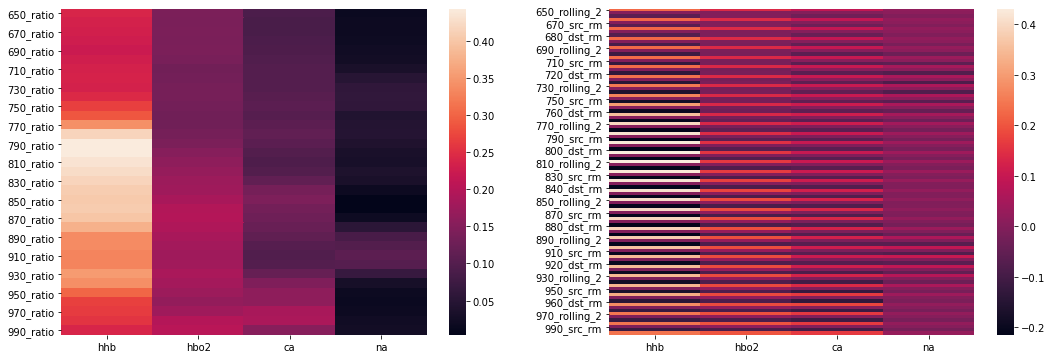

In [105]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 6)
sns.heatmap(train.corr().loc['650_ratio':'990_ratio', 'hhb':'na'], ax=ax1)
sns.heatmap(train.corr().loc['650_rolling_2':'990_rolling_2', 'hhb':'na'], ax=ax2)

In [318]:
drop_ratio_diff4=train.filter(regex='_ratio_diff4$', axis='columns').columns
drop_ratio_diff4

Index(['650_ratio_diff4', '660_ratio_diff4', '670_ratio_diff4',
       '680_ratio_diff4', '690_ratio_diff4', '700_ratio_diff4',
       '710_ratio_diff4', '720_ratio_diff4', '730_ratio_diff4',
       '740_ratio_diff4', '750_ratio_diff4', '760_ratio_diff4',
       '770_ratio_diff4', '780_ratio_diff4', '790_ratio_diff4',
       '800_ratio_diff4', '810_ratio_diff4', '820_ratio_diff4',
       '830_ratio_diff4', '840_ratio_diff4', '850_ratio_diff4',
       '860_ratio_diff4', '870_ratio_diff4', '880_ratio_diff4',
       '890_ratio_diff4', '900_ratio_diff4', '910_ratio_diff4',
       '920_ratio_diff4', '930_ratio_diff4', '940_ratio_diff4',
       '950_ratio_diff4', '960_ratio_diff4', '970_ratio_diff4',
       '980_ratio_diff4', '990_ratio_diff4'],
      dtype='object')

In [325]:
drop_src=train.filter(regex='_src$', axis='columns').columns
drop_src

Index(['650_src', '660_src', '670_src', '680_src', '690_src', '700_src',
       '710_src', '720_src', '730_src', '740_src', '750_src', '760_src',
       '770_src', '780_src', '790_src', '800_src', '810_src', '820_src',
       '830_src', '840_src', '850_src', '860_src', '870_src', '880_src',
       '890_src', '900_src', '910_src', '920_src', '930_src', '940_src',
       '950_src', '960_src', '970_src', '980_src', '990_src'],
      dtype='object')

In [326]:
# 머신러닝
# X는 피처값만 쓰고 Y는 레이블값만 쓴다 머신러닝에 쓰려면 분리해야한다. 필요없는 id 값도 뺸다
Xtrain = train.drop(['id', 'hhb', 'hbo2', 'ca', 'na'], axis = 'columns').drop(drop_ratio_diff4, axis='columns').drop(drop_src, axis='columns')
Ytrain = train[['hhb', 'hbo2', 'ca', 'na']]

Xtest = test.drop(['id'], axis = 'columns').drop(drop_ratio_diff4, axis='columns').drop(drop_src, axis='columns')

In [327]:
#random_state를 고정시켜야 컴퓨터간의 편차가 감소한다. 꼭 넣어야 하는 것은 아닌 듯
# default set 상태의 머신러닝을 불러옴
base_model = LGBMRegressor(random_state=18)
multi_model = MultiOutputRegressor(base_model)

In [328]:
Xtest.shape[0]

10000

In [332]:
from sklearn.model_selection import KFold

# _pred: 예측값// 빈 칸으로 생각할 때는 0으로 넣는 듯 나중에 더하기로 넣는다 일종의 틀을 만듦
y_pred = np.zeros((len(Xtest), 4)) # 학습한 AI로 TEST 데이터의  hhb, hbo2, ca, na 농도 예측값을 저장

x_pred = np.zeros((len(Xtrain), 4)) # 학습한 AI로 Train 데이터의 hhb, hbo2, ca, na 농도 예측값을 저장

# 교차 검증 실제값과 추론한 값을 비교해서 검증한다.
# Validation Error를 확인 머신러닝을 할 때 이 값이 낮을 수록 좋다.

result = 0 # 교차 검증 최종 결과 값 Validation Error의 최종 값이라고 볼 수 있다.
n_splits = 5 # 데이터셋을 몇 등분할 것 인지
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) # K개 Fold 교차 검증
# shuffle=True면 검증할 데이터를 랜덤하게 가져온다 

# 머신러닝에는 데이터프레임을 넣으면 에러가 난다 밸류로 바꿔서 넣어야한다.
#trn_idx 학습용 데이터, val_idx 검증용 데이터,  인덱스 넘버? 들임
for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain)):
    # 학습 데이터와 검증 데이터 분리
    trn_x, trn_y = Xtrain.iloc[trn_idx], Ytrain.iloc[trn_idx]
    val_x, val_y = Xtrain.iloc[val_idx], Ytrain.iloc[val_idx]
    # 머신러닝 학습 fit
    multi_model.fit(trn_x, trn_y) # 학습
    # Xtest 데이터 추론
    # 0, 1, 2, 3, 4 fold의 추론 값들의 총합이 y_pred가 됨
    y_pred += multi_model.predict(Xtest) / n_splits
    
    x_pred += multi_model.predict(Xtrain) / n_splits # train을 추론하여 예측한 hhb, hbo2, ca, na 농도 예측값
    
    
    val_pred = multi_model.predict(val_x) # 검증 데이터 추론
    result += (np.mean((np.abs(val_y - val_pred)))) / n_splits #검증 데이터와 실제 데이터 간 MAE 값, 평가지표
    #MAE (Mean Absolute Error) 절대값(에러 - 실제값)
    print(result)

hhb     0.113110
hbo2    0.087214
ca      0.274786
na      0.212251
dtype: float64
hhb     0.231043
hbo2    0.177835
ca      0.553821
na      0.423094
dtype: float64
hhb     0.348714
hbo2    0.268739
ca      0.832380
na      0.634958
dtype: float64
hhb     0.469231
hbo2    0.358961
ca      1.105681
na      0.855203
dtype: float64
hhb     0.587078
hbo2    0.450671
ca      1.389064
na      1.067526
dtype: float64


In [333]:
result.mean()

0.8735846799677165

In [103]:
# 여러 보간방법해보기 dst 컬럼이랑 a 컬럼 최적의 보간방법 찾아보기
# dst: polynomail 3 / linear, a : polynomail 3 / linear : result.mean() == 0.8854963927909958
# dst: spline 2 / quadratic, a : polynomail 3 / cubic  : result.mean() == 0.9544725852668148
# dst: spline 3 / cubic, a : spline 3 / quadratic  : result.mean() == 0.9508506421907993
# dst: polynomial 3 / nearest, a : polynomial 3 / zero : result.mean() == 0.8728281097191233
# dst: quadratic / cubic, a : cubic / quadratic  : result.mean() == 0.8722333929888815
# dst: quadratic  / zero , a : nearest / linear : result.mean() == 0.8676535176413303 현재 최적
# dst: nearest / zero , a : nearest / quadratic : result.mean() == 0.8977365459160825
# dst: zero / cubic , a : cubic / quadratic : result.mean() == 0.9015138165142038
# dst: quadratic  / zero , a : quadratic / zero : result.mean() == 0.8702998461551956
# dst: nearest / linear , a : nearest / linear : result.mean() == 0.9091175098784736
# dst: zero / quadratic , a : zero / slinear : result.mean() == 0.8962531279026422
# dst: zero / quadratic , a : zero / cubic : result.mean() == 0.8962531279026422
# 제대로 된 건지 모르겠음, 빈값이 존재할 수 있음

# dst: quadratic  / zero / linear , a : nearest / linear : result.mean() == 0.8765104098941949

#롤링 포함
# dst: quadratic  / zero / linear , a : nearest / linear : result.mean() == 0.8734643020700212

# 불필요한 컬럼을 제거하면 개선될 수 있음

In [ ]:
# 새로운 컬럼을 많이 만들었습니다. 불필요한 컬럼을 제거하면 더 개선될 수 있습니다.
# 불필요한 컬럼을 제거하여 최적화하세요(12시 03분)
# dst: quadratic  / zero / linear , a : nearest / linear

#롤링 포함 모든 컬럼 다 있는 경우 : result.mean() == 0.8734643020700212

#_rolling_2 불포함  : result.mean() == 0.8756451360014494
#_src_rm 불포함 : result.mean() == 0.8742019063588586
#_dst_rm 불포함 : result.mean() == 0.8728166989516308
#_dst_m_d 불포함 : result.mean() == 0.8756901217276112
#_dst_m 불포함 : result.mean() == 0.8809675442025283
# _ratio_m_d 불포함 : result.mean() == 0.8729540272655378
# _ratio_m 불포함 : result.mean() == 0.8722129263483683
# _ratio_diff 불포함 : result.mean() == 0.917049911689894
# _ratio_diff2 불포함 : result.mean() == 0.8756757472454221
# _ratio_diff3 불포함 : result.mean() == 0.8738942957150578
# _ratio_diff4 불포함 : result.mean() == 0.8719584640079366 제일 좋은 듯??
# _ratio_diff5 불포함 : result.mean() == 0.8749737406197453
# _ratio_diff6 불포함 : result.mean() == 0.8748993193292269
# _ratio_diff7 불포함 : result.mean() == 0.8750898307772159
# _ratio_m_d, _ratio_m, _dst_rm 불포함 : result.mean() == 0.8720975014537182
# _ratio_diff3, _ratio_m_d, _ratio_m, _dst_rm 불포함 : result.mean() == 0.8741642709771242
# _ratio_diff4, _ratio_m_d, _ratio_m, _dst_rm 불포함 : result.mean() == 0.8741814084697301
# _ratio_diff4, _ratio_m, _dst_rm 불포함 : result.mean() == 0.8732138299424754
# _ratio_diff4, _ratio_m_d, _dst_rm 불포함 : result.mean() == 0.8738942752579828
# _ratio_diff4, _ratio_m, _ratio_m_d 불포함 : result.mean() == 0.8734197429101382
# _ratio_diff4, _ratio_m 불포함 : result.mean() == 0.8720215179780753
# _ratio_diff4, _ratio_m_d 불포함 : result.mean() == 0.8769766793787858
# _ratio_diff4, _dst_rm 불포함 : result.mean() == 0.873857166588669
# _ratio 불포함 : result.mean() == 0.8737523735340125
# _ratio2 불포함 : result.mean() == 0.8805171012634316
# src 불포함 : result.mean() == 0.8761873226827107
# _ratio_diff4, _src_rm 불포함 : result.mean() == 0.8725183973356352
# _ratio_diff4, _src 불포함 : result.mean() == 0.8735846799677165

# 650~990 전체를 날리지 않고 부분적으로 날리는 게 개선이 될 수도 있다.
# 레이블 중 하나를 구할 때 나머지 레이블을 피쳐로 넣을 수도 있다??

In [334]:
x_pred # 인공지능을 Xtrain으로 학습시켜서 Ytrain을 예상한 것

array([[ 5.68372989,  4.41435962,  8.47848869,  3.5855997 ],
       [ 1.32727895,  2.96410044,  7.07531803,  3.77887573],
       [10.41129092,  3.45650164,  8.36662745,  3.40624188],
       ...,
       [ 9.91102533,  3.15169997, 10.03307907,  1.30663875],
       [ 6.06251285,  4.04017852, 11.68301373,  4.44787709],
       [ 9.97531383,  3.78550174, 10.0261173 ,  3.93598311]])

In [335]:
Ytrain

,hhb,hbo2,ca,na
0,5.59,4.32,8.92,4.29
1,0.00,2.83,7.25,4.64
2,10.64,3.00,8.40,5.16
3,5.67,4.01,5.05,4.35
4,11.97,4.41,10.78,2.42
...,...,...,...,...
9995,12.68,4.11,12.31,0.10
9996,8.46,4.11,10.46,3.12
9997,9.84,3.20,10.45,2.06
9998,6.38,4.06,11.28,4.03


In [336]:
y_pred # Xtest를 추론하여 Ytest 값을 예상한 것

array([[ 9.36338604,  3.94161311,  9.65802575,  3.36402274],
       [ 7.45979801,  2.66072076,  8.71904117,  3.2632618 ],
       [11.13620344,  3.92212467,  9.27283881,  3.39749217],
       ...,
       [ 7.2005178 ,  3.7212637 ,  9.470614  ,  3.71970835],
       [12.38401944,  4.59653223,  9.88720245,  3.23844778],
       [ 5.9953672 ,  4.58905186, 10.38899855,  3.01045806]])

In [339]:
x_pred

array([[ 5.68372989,  4.41435962,  8.47848869,  3.5855997 ],
       [ 1.32727895,  2.96410044,  7.07531803,  3.77887573],
       [10.41129092,  3.45650164,  8.36662745,  3.40624188],
       ...,
       [ 9.91102533,  3.15169997, 10.03307907,  1.30663875],
       [ 6.06251285,  4.04017852, 11.68301373,  4.44787709],
       [ 9.97531383,  3.78550174, 10.0261173 ,  3.93598311]])

In [340]:
Xtrain['proxy_hhb'] = x_pred[:,0]
Xtrain['proxy_hbo2'] = x_pred[:,1]
Xtrain['proxy_ca'] = x_pred[:,2]
Xtrain['proxy_na'] = x_pred[:,3]

Xtrain[['proxy_hhb', 'proxy_hbo2', 'proxy_ca', 'proxy_na']]

,proxy_hhb,proxy_hbo2,proxy_ca,proxy_na
0,5.683730,4.414360,8.478489,3.585600
1,1.327279,2.964100,7.075318,3.778876
2,10.411291,3.456502,8.366627,3.406242
3,5.551078,4.080663,4.956621,4.463303
4,11.405842,4.600207,10.012373,2.958237
...,...,...,...,...
9995,12.669637,3.803825,12.654082,1.645753
9996,8.514389,4.085220,11.069058,5.131670
9997,9.911025,3.151700,10.033079,1.306639
9998,6.062513,4.040179,11.683014,4.447877


In [341]:
# proxy 데이터를 feature column으로 사용할 경우
# 추론할 lable과 동일한 feature column을 사용하면
# overfitting이 되어 교차검증 결과가 매우 좋게 나오나
# 실제로는 성능이 많이 떨어지게 되어 반드시 피해야함
# Xtest의 hhb 추론할 경우 proxy_hbo2, proxy_ca, proxy_na 컬럼을 사용
# Xtest의 hbo2 추론할 경우 proxy_hhb, proxy_ca, proxy_na 컬럼을 사용
# Xtest의 ca 추론할 경우 proxy_hhb, proxy_hbo2, proxy_na 컬럼을 사용
# Xtest의 na 추론할 경우 proxy_hhb, proxy_hbo2, proxy_ca 컬럼을 사용
Xtest['proxy_hhb'] = y_pred[:,0]
Xtest['proxy_hbo2'] = y_pred[:,1]
Xtest['proxy_ca'] = y_pred[:,2]
Xtest['proxy_na'] = y_pred[:,3]

Xtest[['proxy_hhb', 'proxy_hbo2', 'proxy_ca', 'proxy_na']]

,proxy_hhb,proxy_hbo2,proxy_ca,proxy_na
0,9.363386,3.941613,9.658026,3.364023
1,7.459798,2.660721,8.719041,3.263262
2,11.136203,3.922125,9.272839,3.397492
3,9.550609,3.788303,8.225344,3.955486
4,6.919561,3.231662,8.950601,2.740471
...,...,...,...,...
9995,5.301813,3.991830,11.107640,4.936815
9996,10.023083,2.973052,9.160501,2.965468
9997,7.200518,3.721264,9.470614,3.719708
9998,12.384019,4.596532,9.887202,3.238448


In [343]:
# y_pred의 빈창고와 같음
sub = pd.read_csv('sample_submission.csv', index_col='id')
sub.head()

,hhb,hbo2,ca,na
id,,,,
10000,0,0,0,0
10001,0,0,0,0
10002,0,0,0,0
10003,0,0,0,0
10004,0,0,0,0


In [345]:
# result의 빈창고와 같음
order = [[0,0,0,0]]
columns = [Ytrain.columns[0],Ytrain.columns[1],Ytrain.columns[2],Ytrain.columns[3]]
output = pd.DataFrame(order, columns=columns)
output

,hhb,hbo2,ca,na
0,0,0,0,0


In [348]:
# hhb, hbo2, ca, na 순으로 반복문 작성
for col in range(4):
    # hhb, hbo2, ca, na 순으로 Ytrain_temp에 하나씩 저장하여 학습, 추론
    Ytrain_temp = Ytrain[Ytrain.columns[col]].copy()
    
    y_pred2 = np.zeros(len(Xtest)) # Xtest를 추론하여 hhb, hbo2, ca, na 순으로 예측한 것을 저장함 (0으로 되어있는 틀인듯)
    x_label = np.zeros(len(Xtrain)) # Xtrain을 추론하여 hhb, hbo2, ca, na 순으로 예측한 것을 저장함 (0으로 되어있는 틀인듯)
    result = 0
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    #동일한 이름의 proxy 컬럼 제거
    Xtrain_f = Xtrain.drop(['proxy_'+Ytrain.columns[col]], axis=1)
    Xtest_f = Xtest.drop(['proxy_'+Ytrain.columns[col]], axis=1)
    
    # hhb, hbo2, ca, na 순으로 각각 5회 교차 검증
    for n_fold, (trn_idx, val_idx) in enumerate(kf.split(Xtrain_f)):
        trn_x, trn_y = Xtrain_f.iloc[trn_idx], Ytrain_temp.iloc[trn_idx]
        val_x, val_y = Xtrain_f.iloc[val_idx], Ytrain_temp.iloc[val_idx]
        # n_estimators 매번 학습 시 추가되는 최종 모델 수
        model = lgb.LGBMRegressor(random_state=18, n_estimators=10000)
        # 앙상블 모델 수많은 모델을 모아서 같이 사용? n_estimators는 모델의 수를 의미? 딥러닝에서 학습 횟수를 건드리는 듯
        # 1번 모델이 학습한 결과에 2번 모델 ... 하는 식인 듯
        
        # early_stopping_rounds 매번 학습 시 모델이 추가됨에도 학습 성능이 개선이 되지 않으면 학습을 멈추고 가장 좋은 결과로 처리 validation error 최소일 때로 돌아감 
        # verbose 특정 학습 횟수 또는 모델 수 마다 중간 결과 보여주는 간격 설정
        # eval_set, eval_metrics 교차 검증 결과를 보기 위한 데이터와 검증 지표
        model.fit(trn_x, trn_y, eval_set=[(trn_x, trn_y), (val_x, val_y)],
                  early_stopping_rounds=100, verbose=-1, eval_metric = 'mae') 
    
        y_pred2 += model.predict(Xtest_f) / n_splits
        x_label += model.predict(Xtrain_f) / n_splits
        
        val_pred = model.predict(val_x)
        result += np.mean((np.abs(val_y - val_pred))) / n_splits
        print(result)
        
    sub[Ytrain.columns[col]] = y_pred2
    output[Ytrain.columns[col]] = result
    
sub 

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[781]	training's l1: 0.0235184	training's l2: 0.00107784	valid_1's l1: 0.501417	valid_1's l2: 0.544405
0.10028346056688928
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[843]	training's l1: 0.018506	training's l2: 0.000675284	valid_1's l1: 0.515925	valid_1's l2: 0.576159
0.20346847703020077
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[417]	training's l1: 0.0839773	training's l2: 0.0126464	valid_1's l1: 0.527188	valid_1's l2: 0.643896
0.3089060122962466
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[505]	training's l1: 0.0599568	training's l2: 0.00650586	valid_1's l1: 0.529459	valid_1's l2: 0.590148
0.4147977293634858
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[369]	training's l1: 0.098

,hhb,hbo2,ca,na
id,,,,
10000,9.568489,3.934639,9.226202,3.023797
10001,7.461399,2.404774,8.177520,3.304868
10002,11.424243,3.925840,10.009045,3.389090
10003,9.457315,3.765009,8.196541,4.067462
10004,7.132422,3.304405,8.468849,3.067124
...,...,...,...,...
19995,4.869426,4.077084,11.487699,4.925935
19996,10.065705,2.730072,9.203797,3.124552
19997,6.850696,3.776434,9.637356,4.088074


In [350]:
output.loc[0].mean()

0.8344691285088157

## 머신러닝의 이해

![앙상블](앙상블.jpg)

In [ ]:
# 머신러닝의 다른 말은 앙상블 모델이며 요즘엔 GBM만 사용함.
# lightgbm은 gbm의 일종임. 컴퓨터 사양을 잘 안타고 학습 속도가 빠른 편

In [ ]:
# 머신러닝을 다른말로 앙상블(인셈블링) 모델 이라고도 한다.
# 아주 간단한 모델을 군집처럼 모아서 처리한다.
# 위 그림 처럼 Bagging과 Boosting 등등으로 나뉜다.
# 요즘에는 Bagging 모델은 잘 안쓰이고 Boosting, Gradient Boosting을 많이 쓴다?
# Gradient Boosting Model 약자로 GBM이라 부른다

![bagging과boosting](bagging과boosting.jpg)

In [ ]:
# bagging은 서로 다른 모델들이 간섭하지 않고 각자 학습/추론하여 각 모델의 평균을 최종 결과로 함.
# bagging 장점: overfitting이 안됨. 단점 underfitting이 잘됨.
# bagging은 머신러닝 보다는 딥러닝에서 자주 사용.

# boosting은 첫 모델이 학습하여 예측한 결과와 실제 값의 오차를 다시 다음 모델이 오차를 학습하여 그 오차를 줄이는 방식으로 함.
# boosting은 수직계열화된 모델 학습 방식임.
# boosting 장점: 학습성능이 우수함. 단점: overfitting이 잘됨
# GBM은 현재 머신러닝의 대세

In [ ]:
# bagging은 모델간 수평, 평행적으로 따로따로 처리됨 /overfitting이 안나온다
# bagging은 모델간 따로따로 학습해서 평균을 최종 결과로 처리한다.
# 머신 러닝에서는 잘 안쓰지만 딥러닝에서는 사용한다

# boosting은 모델간 순차적으로 처리, 수직 계열화 되어있다고도 한다.
# boosting은 추가 모델이 이전 모델에서 나온 오류를 극복하기 위해 다시 학습을 반복
# fitting이 잘 되는 장점, overfitting이 될 가능성이 높다는 단점
# lightgbm은 overfitting될 가능성 이 높다.

# overfitting이 되는 게 차라리 나을 정도로 underfitting은 최악이다.?? 그래서 boosting을 쓴다??

![gbm원리](gbm원리.jpg)

In [ ]:
# gbm의 학습 원리는 tree 또는 모델이 학습하여 오차를 줄이면 다음 모델이 오차를 학습하여 오차를 더 줄여나가는 것을 반복하는 방식임
# 오차가 계속 감소하면서 분포도가 계속 감소하여 실제 값들이 서로 수평 선에 모이는 경향을 보임.
# GBM에서는 오차를 다음 모델이 학습하며 오차를 줄여나간다

![tree](tree.jpg)

In [ ]:
# 머신러닝은 매번 학습할 때 마다 모델 수를 늘려서 오차를 줄여나가는 방식임. 물량으로 성능을 향상시킴.
# 딥러닝은 하나의 모델로 학습을 반복해서 학습 성능을 향상시키는 방식임.
# 여러 모델이 학습(머신러닝) / 하나의 모델이 반복 학습(딥러닝) 

In [ ]:
# XGBOOST 와 LightGBM 둘 다 트리의 형태를 띔
# XGBOOST는 대칭적인 트리의 형태 무거운 편
# LightGBM 한쪽으로 치우쳐서 트리를 깊게 만들 수 있음 비대칭 트리 가능
# 트리의 Leaf, Depth 등을 설정 가능 
# lightgbm 링크: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
# https://lightgbm.readthedocs.io/en/latest/Parameters.html

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
https://lightgbm.readthedocs.io/en/latest/Parameters.html

## Hyperparameter

In [ ]:
# lightgbm 중요 parameter

# boosting_type = gbdt(95% 디폴트 거의 이거 씀), dart(5%중간중간 drop 시켜서 overhitting을 방지할 때 씀), goss(안씀), rondom_forest(안씀)
# objective: mse(default), mae(많이 쓰임), huber, fair, poisson(종종 쓰임), etc...
# n_estimatior(num_iterations(학습횟수) 하고 비슷한 의미인 듯) : 모델 수(또는 학습의 횟수라고도 부름) default:100, 보통 10000~20000을 잡음

# 위는 정해서 쓰면 되고 아래는 랜덤 가능

# max_depth : default:-1(무한)이기 때문에 overfitting 가능성이 있음 -1로 해본 후  overfitting이 되면 max_depth 설정으로 과적합 방지함.
# num_leaves : tree 모델에서 leaf의 최대 수 설정이며, 2의 depth 제곱에서 1을 뺀 값이 최댓값이다, 일반적으로 2**max_depth -1의 절반 이하로 설정
# num_leaves의 값이 크면 성능이 향상될 수 있으나 overfitting의 가능성이 있고, 작으면 overfitting을 방지할 수 있지만 성능 감소 가능성이 있다.
# learning_rate(딥러닝에서와는 달리 각 모델 당 기여도를 의미) : default:0.1(각 모델당 기여도 10%), n_estimatior의 크기에 따라서 설정함.
# 딥러닝과 다르게 스케줄 사용이 불필요함
# 딥러닝의 최적의 learning_rate는 하나라고 할 수 있지만, 머신러닝에서는 최적의 learning_rate가 하나라고 할 수 없다 ??
# colsample_bytree : 컬럼 사용 비율(랜덤임), default:1(모든 컬럼 사용) 일반적으로는 1이 좋고 종종 0.7~0.9 사이 값이 가장 좋을 수 있음
# colsample_bytree 비율 조정으로 overfitting 방지할 수 있고 좋지 못한 컬럼을 거르는 효과도 있다.
# subsample : 데이터(행) 사용 비율 default:1(모든 행 사용) 어떤 데이터냐에 따라 좋은 비율이 정해짐.
# reg_alpha : 과적합 방지를 위해 1차함수를 붙임 람다가 reg_alpha임 default:0, overfitting을 방지하기 위해 넣어주는 1차 함수 저항 일반적으로 작은 값을 넣는다 0~100
# reg_lambda : 과적합 방지를 위해 2차함수를 붙임 람다가 reg_lambdad임 default:0, overfitting을 방지하기 위해 넣어주는 2차 함수 저항, 일반적으로 작은 값을 넣는다 0~100

In [ ]:
# objective : loss function 설정 디폴트는 보통 MSE이며 MAE, RMSE 등 사용 인 듯??
# objective : regression_l2l2mean_squared_errormse
#objective : regression_l1, L1 loss, aliases: , , l1mean_absolute_errormae
# Poisson regression 로그를 사용 지수로 바꿔버리기 때문에 편차를 줄여준다
# MAPE loss 이것도 편차를 줄여줄 수 있는 듯

## hyperparameter tuning

In [351]:
# 랜덤으로 하는 게 좋을 수도?

In [ ]:
coarse_hyperparameters_list = []

num_epoch = 100 # 튜닝의 횟수? 딥러닝에서는 학습 횟수

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=-1, high-30)
    leaves = np.random.randint(low=1, high=14)
    num_leaves = 2**leaves
    # 0.001, 0.01, 0.1에 동등한 확률의 기회를 주기 위해 지수 개념으로 랜덤 추출이 필요함.
    lr = np.random.uniform(low=1, high=4)
    learning_rate = 3*(10**(-lr))